## Setup

In [8]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import urllib
import tensorflow as tf
from tensorflow import keras


# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Get the data

In [4]:
DOWNLOAD_ROOT = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
WINE_PATH = os.path.join("datasets", "wines")
REDWINE_FILE = "winequality-red.csv"
WHITEWINE_FILE = "winequality-white.csv"
REDWINE_URL = DOWNLOAD_ROOT + REDWINE_FILE
WHITEWINE_URL = DOWNLOAD_ROOT + WHITEWINE_FILE
# This function creates a dataset/wines directory, downloads the winequality-red.csv and winequality-white.csv file
def fetch_wine_data(whitewine_url=WHITEWINE_URL, redwine_url_url=REDWINE_URL, wine_path=WINE_PATH, redwine_file=REDWINE_FILE, whitewine_file=WHITEWINE_FILE):
    if not os.path.isdir(wine_path):
        os.makedirs(wine_path)
    red_path = os.path.join(wine_path, redwine_file)
    white_path = os.path.join(wine_path, whitewine_file)
    urllib.request.urlretrieve(whitewine_url, white_path)
    urllib.request.urlretrieve(redwine_url_url, red_path)
    
fetch_wine_data()

## Load, split and scale the dataset

In [5]:
# Loads the dataset from the csv file and returns a pandas DataFrame object.
def load_wine_data(wine_file, wine_path=WINE_PATH):
    csv_path = os.path.join(wine_path, wine_file)
    return pd.read_csv(csv_path,sep=";")

redwine = load_wine_data(wine_file=REDWINE_FILE)
# load the dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = redwine.iloc[:, 0:11].values
y = redwine.iloc[:,-1].values

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)




In [6]:
X_train.shape[1:]

(11,)

## Build, compile, train and evaluate a model

In [11]:
# Build a model.
def getModel(optimizer = 'sgd'):
    model = keras.models.Sequential([
    # hidden layer
    keras.layers.Dense(6, activation="relu", input_shape=X_train.shape[1:]),
    # output layer
    keras.layers.Dense(1)
    ])
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    return model

model = getModel()

In [12]:
# Train the model.
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
29/29 [==============================] - 0s 7ms/step - loss: 12.8429 - val_loss: 3.5022
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 2.3321 - val_loss: 1.4776
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3691 - val_loss: 1.1170
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 1.0244 - val_loss: 0.8342
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.8188 - val_loss: 0.6862
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6909 - val_loss: 0.6360
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6195 - val_loss: 0.5710
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5746 - val_loss: 0.5900
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5501 - val_loss: 0.5828
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5262 - val_loss: 0.5298
Epoch 11

29/29 [==============================] - 0s 2ms/step - loss: 0.4153 - val_loss: 0.4724
Epoch 84/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4156 - val_loss: 0.4819
Epoch 85/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4133 - val_loss: 0.4774
Epoch 86/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.4827
Epoch 87/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4143 - val_loss: 0.5075
Epoch 88/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4141 - val_loss: 0.4742
Epoch 89/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4103 - val_loss: 0.4945
Epoch 90/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4144 - val_loss: 0.4751
Epoch 91/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4118 - val_loss: 0.4667
Epoch 92/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4138 - val_loss: 0.4775
Epoch 93/100


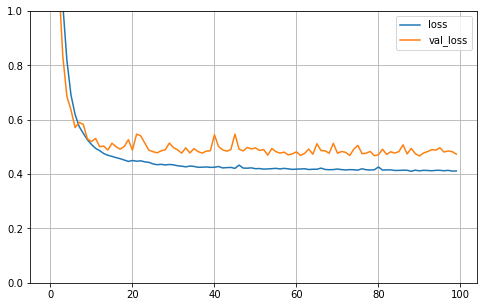

In [13]:
# Show the learning curves.         
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()         

In [14]:
# Evaluate the model (outputs the RMSE).
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 615us/step - loss: 0.3843


0.3842611312866211

### Use GridSearchCV to tune hyperparameters

In [15]:


from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


par = {'batch_size' : [25,32],
          'epochs' : [200,500],
          'optimizer':['adam','rmsprop']}


Kmodel = KerasRegressor(build_fn=getModel, verbose=1)
grid = GridSearchCV(estimator=Kmodel, param_grid = par)
grid_result = grid.fit(X_train, y_train)

Epoch 1/200
29/29 [==============================] - 0s 827us/step - loss: 36.0269
Epoch 2/200
29/29 [==============================] - 0s 827us/step - loss: 32.9494
Epoch 3/200
29/29 [==============================] - 0s 1ms/step - loss: 30.1417
Epoch 4/200
29/29 [==============================] - 0s 827us/step - loss: 27.5599
Epoch 5/200
29/29 [==============================] - 0s 1ms/step - loss: 25.2051
Epoch 6/200
29/29 [==============================] - 0s 1ms/step - loss: 23.0219
Epoch 7/200
29/29 [==============================] - 0s 1ms/step - loss: 20.9911
Epoch 8/200
29/29 [==============================] - 0s 1ms/step - loss: 19.1217
Epoch 9/200
29/29 [==============================] - 0s 1ms/step - loss: 17.3550
Epoch 10/200
29/29 [==============================] - 0s 827us/step - loss: 15.7351
Epoch 11/200
29/29 [==============================] - 0s 827us/step - loss: 14.2459
Epoch 12/200
29/29 [==============================] - 0s 827us/step - loss: 12.8797
Epoch 13/200


29/29 [==============================] - 0s 1ms/step - loss: 0.5161
Epoch 101/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5124
Epoch 102/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5084
Epoch 103/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5061
Epoch 104/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5021
Epoch 105/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4995
Epoch 106/200
29/29 [==============================] - 0s 827us/step - loss: 0.4957
Epoch 107/200
29/29 [==============================] - 0s 827us/step - loss: 0.4948
Epoch 108/200
29/29 [==============================] - 0s 827us/step - loss: 0.4902
Epoch 109/200
29/29 [==============================] - 0s 827us/step - loss: 0.4877
Epoch 110/200
29/29 [==============================] - 0s 827us/step - loss: 0.4854
Epoch 111/200
29/29 [==============================] - 0s 827us/step - loss: 0.4819
Epoch 112/200
29/2

29/29 [==============================] - 0s 1ms/step - loss: 0.3845
Epoch 199/200
29/29 [==============================] - 0s 827us/step - loss: 0.3847
Epoch 200/200
8/8 [==============================] - 0s 999us/step - loss: 0.4624
Epoch 1/200
29/29 [==============================] - 0s 827us/step - loss: 34.8527
Epoch 2/200
29/29 [==============================] - 0s 1ms/step - loss: 32.6033
Epoch 3/200
29/29 [==============================] - 0s 1ms/step - loss: 30.5803
Epoch 4/200
29/29 [==============================] - 0s 1ms/step - loss: 28.7362
Epoch 5/200
29/29 [==============================] - 0s 827us/step - loss: 27.0096
Epoch 6/200
29/29 [==============================] - 0s 827us/step - loss: 25.3887
Epoch 7/200
29/29 [==============================] - 0s 827us/step - loss: 23.8310
Epoch 8/200
29/29 [==============================] - 0s 827us/step - loss: 22.3516
Epoch 9/200
29/29 [==============================] - 0s 1ms/step - loss: 20.9006
Epoch 10/200
29/29 [=======

29/29 [==============================] - 0s 827us/step - loss: 0.7588
Epoch 97/200
29/29 [==============================] - 0s 1ms/step - loss: 0.7437
Epoch 98/200
29/29 [==============================] - 0s 827us/step - loss: 0.7274
Epoch 99/200
29/29 [==============================] - 0s 827us/step - loss: 0.7135
Epoch 100/200
29/29 [==============================] - 0s 827us/step - loss: 0.6994
Epoch 101/200
29/29 [==============================] - 0s 827us/step - loss: 0.6872
Epoch 102/200
29/29 [==============================] - 0s 827us/step - loss: 0.6752
Epoch 103/200
29/29 [==============================] - 0s 827us/step - loss: 0.6644
Epoch 104/200
29/29 [==============================] - 0s 827us/step - loss: 0.6529
Epoch 105/200
29/29 [==============================] - 0s 1ms/step - loss: 0.6440
Epoch 106/200
29/29 [==============================] - 0s 1ms/step - loss: 0.6345
Epoch 107/200
29/29 [==============================] - 0s 827us/step - loss: 0.6263
Epoch 108/200
2

29/29 [==============================] - 0s 827us/step - loss: 0.4116
Epoch 195/200
29/29 [==============================] - 0s 827us/step - loss: 0.4121
Epoch 196/200
29/29 [==============================] - 0s 827us/step - loss: 0.4116
Epoch 197/200
29/29 [==============================] - 0s 827us/step - loss: 0.4102
Epoch 198/200
29/29 [==============================] - 0s 827us/step - loss: 0.4086
Epoch 199/200
29/29 [==============================] - 0s 827us/step - loss: 0.4081
Epoch 200/200
8/8 [==============================] - 0s 995us/step - loss: 0.3845
Epoch 1/200
29/29 [==============================] - 0s 1ms/step - loss: 30.5851
Epoch 2/200
29/29 [==============================] - 0s 827us/step - loss: 28.4910
Epoch 3/200
29/29 [==============================] - 0s 827us/step - loss: 26.6489
Epoch 4/200
29/29 [==============================] - 0s 827us/step - loss: 25.0517
Epoch 5/200
29/29 [==============================] - 0s 827us/step - loss: 23.6715
Epoch 6/200
29/

Epoch 93/200
29/29 [==============================] - 0s 827us/step - loss: 0.5452
Epoch 94/200
29/29 [==============================] - 0s 827us/step - loss: 0.5402
Epoch 95/200
29/29 [==============================] - 0s 827us/step - loss: 0.5332
Epoch 96/200
29/29 [==============================] - 0s 827us/step - loss: 0.5297
Epoch 97/200
29/29 [==============================] - 0s 867us/step - loss: 0.5235
Epoch 98/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5180
Epoch 99/200
29/29 [==============================] - 0s 827us/step - loss: 0.5144
Epoch 100/200
29/29 [==============================] - 0s 827us/step - loss: 0.5103
Epoch 101/200
29/29 [==============================] - 0s 827us/step - loss: 0.5055
Epoch 102/200
29/29 [==============================] - 0s 827us/step - loss: 0.5015
Epoch 103/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4977
Epoch 104/200
29/29 [==============================] - 0s 827us/step - loss: 0.4953
Epo

29/29 [==============================] - 0s 1ms/step - loss: 0.3956
Epoch 192/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3965
Epoch 193/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3941
Epoch 194/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3945
Epoch 195/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3943
Epoch 196/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3950
Epoch 197/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3944
Epoch 198/200
29/29 [==============================] - 0s 827us/step - loss: 0.3944
Epoch 199/200
29/29 [==============================] - 0s 827us/step - loss: 0.3934
Epoch 200/200
8/8 [==============================] - 0s 999us/step - loss: 0.5082
Epoch 1/200
29/29 [==============================] - 0s 827us/step - loss: 38.6124
Epoch 2/200
29/29 [==============================] - 0s 827us/step - loss: 34.7068
Epoch 3/200
29/29 [=====

Epoch 90/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5981
Epoch 91/200
29/29 [==============================] - 0s 827us/step - loss: 0.5913
Epoch 92/200
29/29 [==============================] - 0s 827us/step - loss: 0.5856
Epoch 93/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5795
Epoch 94/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5745
Epoch 95/200
29/29 [==============================] - 0s 827us/step - loss: 0.5684
Epoch 96/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5640
Epoch 97/200
29/29 [==============================] - 0s 827us/step - loss: 0.5591
Epoch 98/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5543
Epoch 99/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5490
Epoch 100/200
29/29 [==============================] - 0s 827us/step - loss: 0.5453
Epoch 101/200
29/29 [==============================] - 0s 827us/step - loss: 0.5403
Epoch 102/200


29/29 [==============================] - 0s 1ms/step - loss: 0.3988
Epoch 190/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3988
Epoch 191/200
29/29 [==============================] - 0s 827us/step - loss: 0.3986
Epoch 192/200
29/29 [==============================] - 0s 827us/step - loss: 0.3976
Epoch 193/200
29/29 [==============================] - 0s 827us/step - loss: 0.3966
Epoch 194/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3971
Epoch 195/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3974
Epoch 196/200
29/29 [==============================] - 0s 827us/step - loss: 0.3966
Epoch 197/200
29/29 [==============================] - 0s 827us/step - loss: 0.3964
Epoch 198/200
29/29 [==============================] - 0s 827us/step - loss: 0.3963
Epoch 199/200
29/29 [==============================] - 0s 827us/step - loss: 0.3954
Epoch 200/200
8/8 [==============================] - 0s 996us/step - loss: 0.4295
Epoch 1/200
29/2

29/29 [==============================] - 0s 1ms/step - loss: 0.5568
Epoch 89/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5469
Epoch 90/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5386
Epoch 91/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5324
Epoch 92/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5257
Epoch 93/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5211
Epoch 94/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5135
Epoch 95/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5079
Epoch 96/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5031
Epoch 97/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4979
Epoch 98/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4954
Epoch 99/200
29/29 [==============================] - 0s 827us/step - loss: 0.4886
Epoch 100/200
29/29 [==================

29/29 [==============================] - 0s 1ms/step - loss: 0.3822
Epoch 188/200
29/29 [==============================] - 0s 827us/step - loss: 0.3812
Epoch 189/200
29/29 [==============================] - 0s 827us/step - loss: 0.3815
Epoch 190/200
29/29 [==============================] - 0s 827us/step - loss: 0.3811
Epoch 191/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3810
Epoch 192/200
29/29 [==============================] - 0s 827us/step - loss: 0.3788
Epoch 193/200
29/29 [==============================] - 0s 827us/step - loss: 0.3798
Epoch 194/200
29/29 [==============================] - 0s 827us/step - loss: 0.3788
Epoch 195/200
29/29 [==============================] - 0s 827us/step - loss: 0.3787
Epoch 196/200
29/29 [==============================] - 0s 827us/step - loss: 0.3771
Epoch 197/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3781
Epoch 198/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3778
Epoch 199/200


29/29 [==============================] - 0s 827us/step - loss: 0.4619
Epoch 86/200
29/29 [==============================] - 0s 827us/step - loss: 0.4597
Epoch 87/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4589
Epoch 88/200
29/29 [==============================] - 0s 827us/step - loss: 0.4561
Epoch 89/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4561
Epoch 90/200
29/29 [==============================] - 0s 827us/step - loss: 0.4504
Epoch 91/200
29/29 [==============================] - 0s 827us/step - loss: 0.4504
Epoch 92/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4483
Epoch 93/200
29/29 [==============================] - 0s 827us/step - loss: 0.4449
Epoch 94/200
29/29 [==============================] - 0s 827us/step - loss: 0.4436
Epoch 95/200
29/29 [==============================] - 0s 827us/step - loss: 0.4432
Epoch 96/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4412
Epoch 97/200
29/29 [=====

29/29 [==============================] - 0s 827us/step - loss: 0.3876
Epoch 183/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3873
Epoch 184/200
29/29 [==============================] - 0s 827us/step - loss: 0.3863
Epoch 185/200
29/29 [==============================] - 0s 827us/step - loss: 0.3872
Epoch 186/200
29/29 [==============================] - 0s 827us/step - loss: 0.3862
Epoch 187/200
29/29 [==============================] - 0s 827us/step - loss: 0.3850
Epoch 188/200
29/29 [==============================] - 0s 827us/step - loss: 0.3852
Epoch 189/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3860
Epoch 190/200
29/29 [==============================] - 0s 827us/step - loss: 0.3853
Epoch 191/200
29/29 [==============================] - 0s 827us/step - loss: 0.3834
Epoch 192/200
29/29 [==============================] - 0s 827us/step - loss: 0.3838
Epoch 193/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3834
Epoch 194/20

29/29 [==============================] - 0s 1ms/step - loss: 0.5292
Epoch 81/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5242
Epoch 82/200
29/29 [==============================] - 0s 827us/step - loss: 0.5182
Epoch 83/200
29/29 [==============================] - 0s 852us/step - loss: 0.5143
Epoch 84/200
29/29 [==============================] - 0s 827us/step - loss: 0.5101
Epoch 85/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5062
Epoch 86/200
29/29 [==============================] - 0s 827us/step - loss: 0.5022
Epoch 87/200
29/29 [==============================] - 0s 827us/step - loss: 0.5003
Epoch 88/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4949
Epoch 89/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4927
Epoch 90/200
29/29 [==============================] - 0s 827us/step - loss: 0.4877
Epoch 91/200
29/29 [==============================] - 0s 827us/step - loss: 0.4855
Epoch 92/200
29/29 [=======

29/29 [==============================] - 0s 827us/step - loss: 0.3935
Epoch 180/200
29/29 [==============================] - 0s 827us/step - loss: 0.3935
Epoch 181/200
29/29 [==============================] - 0s 827us/step - loss: 0.3934
Epoch 182/200
29/29 [==============================] - 0s 827us/step - loss: 0.3924
Epoch 183/200
29/29 [==============================] - 0s 827us/step - loss: 0.3922
Epoch 184/200
29/29 [==============================] - 0s 827us/step - loss: 0.3916
Epoch 185/200
29/29 [==============================] - 0s 827us/step - loss: 0.3919
Epoch 186/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3914
Epoch 187/200
29/29 [==============================] - 0s 827us/step - loss: 0.3903
Epoch 188/200
29/29 [==============================] - 0s 827us/step - loss: 0.3900
Epoch 189/200
29/29 [==============================] - 0s 827us/step - loss: 0.3901
Epoch 190/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3896
Epoch 191/

29/29 [==============================] - 0s 827us/step - loss: 0.4746
Epoch 78/200
29/29 [==============================] - 0s 827us/step - loss: 0.4703
Epoch 79/200
29/29 [==============================] - 0s 827us/step - loss: 0.4676
Epoch 80/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4627
Epoch 81/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4595
Epoch 82/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4558
Epoch 83/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4514
Epoch 84/200
29/29 [==============================] - 0s 827us/step - loss: 0.4509
Epoch 85/200
29/29 [==============================] - 0s 827us/step - loss: 0.4491
Epoch 86/200
29/29 [==============================] - 0s 827us/step - loss: 0.4465
Epoch 87/200
29/29 [==============================] - 0s 827us/step - loss: 0.4435
Epoch 88/200
29/29 [==============================] - 0s 827us/step - loss: 0.4414
Epoch 89/200
29/29 [=====

29/29 [==============================] - 0s 827us/step - loss: 0.3931
Epoch 176/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3934
Epoch 177/200
29/29 [==============================] - 0s 827us/step - loss: 0.3936
Epoch 178/200
29/29 [==============================] - 0s 828us/step - loss: 0.3919
Epoch 179/200
29/29 [==============================] - 0s 827us/step - loss: 0.3919
Epoch 180/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3930
Epoch 181/200
29/29 [==============================] - 0s 827us/step - loss: 0.3920
Epoch 182/200
29/29 [==============================] - 0s 827us/step - loss: 0.3925
Epoch 183/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3911
Epoch 184/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3910
Epoch 185/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3922
Epoch 186/200
29/29 [==============================] - 0s 827us/step - loss: 0.3916
Epoch 187/200
29

29/29 [==============================] - 0s 827us/step - loss: 0.5837
Epoch 73/200
29/29 [==============================] - 0s 827us/step - loss: 0.5794
Epoch 74/200
29/29 [==============================] - 0s 827us/step - loss: 0.5739
Epoch 75/200
29/29 [==============================] - 0s 827us/step - loss: 0.5699
Epoch 76/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5649
Epoch 77/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5598
Epoch 78/200
29/29 [==============================] - 0s 827us/step - loss: 0.5554
Epoch 79/200
29/29 [==============================] - 0s 827us/step - loss: 0.5517
Epoch 80/200
29/29 [==============================] - 0s 827us/step - loss: 0.5477
Epoch 81/200
29/29 [==============================] - 0s 827us/step - loss: 0.5427
Epoch 82/200
29/29 [==============================] - 0s 827us/step - loss: 0.5396
Epoch 83/200
29/29 [==============================] - 0s 827us/step - loss: 0.5357
Epoch 84/200
29/29 [=

29/29 [==============================] - 0s 827us/step - loss: 0.4198
Epoch 171/200
29/29 [==============================] - 0s 827us/step - loss: 0.4201
Epoch 172/200
29/29 [==============================] - 0s 827us/step - loss: 0.4205
Epoch 173/200
29/29 [==============================] - 0s 827us/step - loss: 0.4185
Epoch 174/200
29/29 [==============================] - 0s 827us/step - loss: 0.4185
Epoch 175/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4191
Epoch 176/200
29/29 [==============================] - 0s 827us/step - loss: 0.4187
Epoch 177/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4180
Epoch 178/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4169
Epoch 179/200
29/29 [==============================] - 0s 827us/step - loss: 0.4170
Epoch 180/200
29/29 [==============================] - 0s 827us/step - loss: 0.4167
Epoch 181/200
29/29 [==============================] - 0s 827us/step - loss: 0.4160
Epoch 182/20

29/29 [==============================] - 0s 827us/step - loss: 0.5016
Epoch 69/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4952
Epoch 70/200
29/29 [==============================] - 0s 827us/step - loss: 0.4887
Epoch 71/200
29/29 [==============================] - 0s 827us/step - loss: 0.4822
Epoch 72/200
29/29 [==============================] - 0s 827us/step - loss: 0.4771
Epoch 73/200
29/29 [==============================] - 0s 827us/step - loss: 0.4713
Epoch 74/200
29/29 [==============================] - 0s 827us/step - loss: 0.4665
Epoch 75/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4622
Epoch 76/200
29/29 [==============================] - 0s 1ms/step - loss: 0.4589
Epoch 77/200
29/29 [==============================] - 0s 827us/step - loss: 0.4545
Epoch 78/200
29/29 [==============================] - 0s 827us/step - loss: 0.4513
Epoch 79/200
29/29 [==============================] - 0s 827us/step - loss: 0.4470
Epoch 80/200
29/29 [===

29/29 [==============================] - 0s 1ms/step - loss: 0.3771
Epoch 167/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3774
Epoch 168/200
29/29 [==============================] - 0s 827us/step - loss: 0.3771
Epoch 169/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3774
Epoch 170/200
29/29 [==============================] - 0s 827us/step - loss: 0.3767
Epoch 171/200
29/29 [==============================] - 0s 827us/step - loss: 0.3761
Epoch 172/200
29/29 [==============================] - 0s 827us/step - loss: 0.3765
Epoch 173/200
29/29 [==============================] - 0s 827us/step - loss: 0.3756
Epoch 174/200
29/29 [==============================] - 0s 827us/step - loss: 0.3767
Epoch 175/200
29/29 [==============================] - 0s 1ms/step - loss: 0.3757
Epoch 176/200
29/29 [==============================] - 0s 827us/step - loss: 0.3752
Epoch 177/200
29/29 [==============================] - 0s 827us/step - loss: 0.3759
Epoch 178/200


29/29 [==============================] - 0s 827us/step - loss: 0.9445
Epoch 64/500
29/29 [==============================] - 0s 827us/step - loss: 0.9261
Epoch 65/500
29/29 [==============================] - 0s 827us/step - loss: 0.9069
Epoch 66/500
29/29 [==============================] - 0s 827us/step - loss: 0.8862
Epoch 67/500
29/29 [==============================] - 0s 827us/step - loss: 0.8682
Epoch 68/500
29/29 [==============================] - 0s 1ms/step - loss: 0.8514
Epoch 69/500
29/29 [==============================] - 0s 827us/step - loss: 0.8353
Epoch 70/500
29/29 [==============================] - 0s 827us/step - loss: 0.8184
Epoch 71/500
29/29 [==============================] - 0s 827us/step - loss: 0.8025
Epoch 72/500
29/29 [==============================] - 0s 827us/step - loss: 0.7878
Epoch 73/500
29/29 [==============================] - 0s 827us/step - loss: 0.7750
Epoch 74/500
29/29 [==============================] - 0s 827us/step - loss: 0.7587
Epoch 75/500
29/29 

29/29 [==============================] - 0s 1ms/step - loss: 0.4112
Epoch 162/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4135
Epoch 163/500
29/29 [==============================] - 0s 827us/step - loss: 0.4118
Epoch 164/500
29/29 [==============================] - 0s 827us/step - loss: 0.4115
Epoch 165/500
29/29 [==============================] - 0s 827us/step - loss: 0.4105
Epoch 166/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4103
Epoch 167/500
29/29 [==============================] - 0s 827us/step - loss: 0.4114
Epoch 168/500
29/29 [==============================] - 0s 827us/step - loss: 0.4093
Epoch 169/500
29/29 [==============================] - 0s 827us/step - loss: 0.4094
Epoch 170/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4089
Epoch 171/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4094
Epoch 172/500
29/29 [==============================] - 0s 827us/step - loss: 0.4079
Epoch 173/500
29

29/29 [==============================] - 0s 1ms/step - loss: 0.3960
Epoch 260/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3948
Epoch 261/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3954
Epoch 262/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3954
Epoch 263/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3963
Epoch 264/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3955
Epoch 265/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3950
Epoch 266/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3954
Epoch 267/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3942
Epoch 268/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3967
Epoch 269/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3946
Epoch 270/500
29/29 [==============================] - 0s 827us/step - loss: 0.3950
Epoch 271/500
29/29 [=======

29/29 [==============================] - 0s 551us/step - loss: 0.3923
Epoch 359/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3903
Epoch 360/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3909
Epoch 361/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3895
Epoch 362/500
29/29 [==============================] - 0s 827us/step - loss: 0.3911
Epoch 363/500
29/29 [==============================] - 0s 827us/step - loss: 0.3915
Epoch 364/500
29/29 [==============================] - 0s 827us/step - loss: 0.3916
Epoch 365/500
29/29 [==============================] - 0s 827us/step - loss: 0.3891
Epoch 366/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3956
Epoch 367/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3901
Epoch 368/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3911
Epoch 369/500
29/29 [==============================] - 0s 827us/step - loss: 0.3899
Epoch 370/500
29/2

29/29 [==============================] - 0s 1ms/step - loss: 0.3911
Epoch 456/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3899
Epoch 457/500
29/29 [==============================] - 0s 827us/step - loss: 0.3909
Epoch 458/500
29/29 [==============================] - 0s 856us/step - loss: 0.3901
Epoch 459/500
29/29 [==============================] - 0s 827us/step - loss: 0.3922
Epoch 460/500
29/29 [==============================] - 0s 827us/step - loss: 0.3898
Epoch 461/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3882
Epoch 462/500
29/29 [==============================] - 0s 827us/step - loss: 0.3878
Epoch 463/500
29/29 [==============================] - 0s 827us/step - loss: 0.3892
Epoch 464/500
29/29 [==============================] - 0s 827us/step - loss: 0.3895
Epoch 465/500
29/29 [==============================] - 0s 827us/step - loss: 0.3885
Epoch 466/500
29/29 [==============================] - 0s 827us/step - loss: 0.3897
Epoch 467/50

29/29 [==============================] - 0s 1ms/step - loss: 1.6695
Epoch 54/500
29/29 [==============================] - 0s 1ms/step - loss: 1.6264
Epoch 55/500
29/29 [==============================] - 0s 827us/step - loss: 1.5843
Epoch 56/500
29/29 [==============================] - 0s 827us/step - loss: 1.5451
Epoch 57/500
29/29 [==============================] - 0s 827us/step - loss: 1.5035
Epoch 58/500
29/29 [==============================] - 0s 827us/step - loss: 1.4663
Epoch 59/500
29/29 [==============================] - 0s 827us/step - loss: 1.4284
Epoch 60/500
29/29 [==============================] - 0s 1ms/step - loss: 1.3923
Epoch 61/500
29/29 [==============================] - 0s 1ms/step - loss: 1.3576
Epoch 62/500
29/29 [==============================] - 0s 827us/step - loss: 1.3247
Epoch 63/500
29/29 [==============================] - 0s 827us/step - loss: 1.2902
Epoch 64/500
29/29 [==============================] - 0s 827us/step - loss: 1.2597
Epoch 65/500
29/29 [=====

Epoch 152/500
29/29 [==============================] - 0s 827us/step - loss: 0.4407
Epoch 153/500
29/29 [==============================] - 0s 827us/step - loss: 0.4403
Epoch 154/500
29/29 [==============================] - 0s 827us/step - loss: 0.4382
Epoch 155/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4386
Epoch 156/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4357
Epoch 157/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4351
Epoch 158/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4358
Epoch 159/500
29/29 [==============================] - 0s 2ms/step - loss: 0.4326
Epoch 160/500
29/29 [==============================] - 0s 2ms/step - loss: 0.4326
Epoch 161/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4317
Epoch 162/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4318
Epoch 163/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4297
Epoch 164/

29/29 [==============================] - 0s 1ms/step - loss: 0.4024
Epoch 251/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4027
Epoch 252/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4012
Epoch 253/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4021
Epoch 254/500
29/29 [==============================] - ETA: 0s - loss: 0.336 - 0s 1ms/step - loss: 0.4020
Epoch 255/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4012
Epoch 256/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4013
Epoch 257/500
29/29 [==============================] - 0s 827us/step - loss: 0.4006
Epoch 258/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4000
Epoch 259/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3988
Epoch 260/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3995
Epoch 261/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3993
Epoc

29/29 [==============================] - 0s 827us/step - loss: 0.3921
Epoch 349/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3898
Epoch 350/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3909
Epoch 351/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3902
Epoch 352/500
29/29 [==============================] - 0s 827us/step - loss: 0.3912
Epoch 353/500
29/29 [==============================] - 0s 827us/step - loss: 0.3898
Epoch 354/500
29/29 [==============================] - 0s 827us/step - loss: 0.3893
Epoch 355/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3895
Epoch 356/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3899
Epoch 357/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3913
Epoch 358/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3890
Epoch 359/500
29/29 [==============================] - 0s 827us/step - loss: 0.3889
Epoch 360/500
29/29 

29/29 [==============================] - 0s 827us/step - loss: 0.3799
Epoch 447/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3808
Epoch 448/500
29/29 [==============================] - 0s 827us/step - loss: 0.3793
Epoch 449/500
29/29 [==============================] - 0s 827us/step - loss: 0.3797
Epoch 450/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3791
Epoch 451/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 452/500
29/29 [==============================] - 0s 827us/step - loss: 0.3808
Epoch 453/500
29/29 [==============================] - 0s 827us/step - loss: 0.3785
Epoch 454/500
29/29 [==============================] - 0s 827us/step - loss: 0.3794
Epoch 455/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3804
Epoch 456/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3794
Epoch 457/500
29/29 [==============================] - 0s 827us/step - loss: 0.3806
Epoch 458/500
29

29/29 [==============================] - 0s 1ms/step - loss: 1.8319
Epoch 45/500
29/29 [==============================] - 0s 1ms/step - loss: 1.7742
Epoch 46/500
29/29 [==============================] - 0s 1ms/step - loss: 1.7209
Epoch 47/500
29/29 [==============================] - 0s 1ms/step - loss: 1.6694
Epoch 48/500
29/29 [==============================] - 0s 1ms/step - loss: 1.6205
Epoch 49/500
29/29 [==============================] - 0s 1ms/step - loss: 1.5724
Epoch 50/500
29/29 [==============================] - 0s 1ms/step - loss: 1.5260
Epoch 51/500
29/29 [==============================] - 0s 827us/step - loss: 1.4826
Epoch 52/500
29/29 [==============================] - 0s 827us/step - loss: 1.4401
Epoch 53/500
29/29 [==============================] - 0s 827us/step - loss: 1.3993
Epoch 54/500
29/29 [==============================] - 0s 827us/step - loss: 1.3606
Epoch 55/500
29/29 [==============================] - 0s 827us/step - loss: 1.3226
Epoch 56/500
29/29 [===========

29/29 [==============================] - 0s 827us/step - loss: 0.4308
Epoch 144/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4283
Epoch 145/500
29/29 [==============================] - 0s 828us/step - loss: 0.4277
Epoch 146/500
29/29 [==============================] - 0s 827us/step - loss: 0.4254
Epoch 147/500
29/29 [==============================] - 0s 827us/step - loss: 0.4243
Epoch 148/500
29/29 [==============================] - 0s 827us/step - loss: 0.4235
Epoch 149/500
29/29 [==============================] - 0s 827us/step - loss: 0.4224
Epoch 150/500
29/29 [==============================] - 0s 828us/step - loss: 0.4205
Epoch 151/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4198
Epoch 152/500
29/29 [==============================] - 0s 827us/step - loss: 0.4185
Epoch 153/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4167
Epoch 154/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4161
Epoch 155/500


Epoch 242/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3803
Epoch 243/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3819
Epoch 244/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3794
Epoch 245/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3799
Epoch 246/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3790
Epoch 247/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3800
Epoch 248/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3803
Epoch 249/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3792
Epoch 250/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3782
Epoch 251/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3803
Epoch 252/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3798
Epoch 253/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 254/500
29

29/29 [==============================] - 0s 827us/step - loss: 0.3700
Epoch 341/500
29/29 [==============================] - 0s 827us/step - loss: 0.3696
Epoch 342/500
29/29 [==============================] - 0s 827us/step - loss: 0.3706
Epoch 343/500
29/29 [==============================] - 0s 827us/step - loss: 0.3702
Epoch 344/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3706
Epoch 345/500
29/29 [==============================] - 0s 827us/step - loss: 0.3708
Epoch 346/500
29/29 [==============================] - 0s 827us/step - loss: 0.3701
Epoch 347/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3705
Epoch 348/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3721
Epoch 349/500
29/29 [==============================] - 0s 827us/step - loss: 0.3707
Epoch 350/500
29/29 [==============================] - 0s 827us/step - loss: 0.3728
Epoch 351/500
29/29 [==============================] - 0s 827us/step - loss: 0.3695
Epoch 352/50

29/29 [==============================] - 0s 1ms/step - loss: 0.3649
Epoch 438/500
29/29 [==============================] - 0s 827us/step - loss: 0.3662
Epoch 439/500
29/29 [==============================] - 0s 827us/step - loss: 0.3659
Epoch 440/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3657
Epoch 441/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3669
Epoch 442/500
29/29 [==============================] - 0s 827us/step - loss: 0.3651
Epoch 443/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3650
Epoch 444/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3647
Epoch 445/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3659
Epoch 446/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3671
Epoch 447/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3681
Epoch 448/500
29/29 [==============================] - 0s 827us/step - loss: 0.3658
Epoch 449/500
29/29 [=

29/29 [==============================] - 0s 827us/step - loss: 14.3677
Epoch 36/500
29/29 [==============================] - 0s 827us/step - loss: 13.9479
Epoch 37/500
29/29 [==============================] - 0s 827us/step - loss: 13.5676
Epoch 38/500
29/29 [==============================] - 0s 1ms/step - loss: 13.2201
Epoch 39/500
29/29 [==============================] - 0s 1ms/step - loss: 12.8906
Epoch 40/500
29/29 [==============================] - 0s 827us/step - loss: 12.5836
Epoch 41/500
29/29 [==============================] - 0s 827us/step - loss: 12.2858
Epoch 42/500
29/29 [==============================] - 0s 827us/step - loss: 11.9968
Epoch 43/500
29/29 [==============================] - 0s 827us/step - loss: 11.7218
Epoch 44/500
29/29 [==============================] - 0s 827us/step - loss: 11.4450
Epoch 45/500
29/29 [==============================] - 0s 1ms/step - loss: 11.1669
Epoch 46/500
29/29 [==============================] - 0s 827us/step - loss: 10.8781
Epoch 47/50

29/29 [==============================] - 0s 1ms/step - loss: 0.4351
Epoch 134/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4335
Epoch 135/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4324
Epoch 136/500
29/29 [==============================] - 0s 827us/step - loss: 0.4315
Epoch 137/500
29/29 [==============================] - 0s 827us/step - loss: 0.4303
Epoch 138/500
29/29 [==============================] - 0s 828us/step - loss: 0.4298
Epoch 139/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4274
Epoch 140/500
29/29 [==============================] - 0s 827us/step - loss: 0.4272
Epoch 141/500
29/29 [==============================] - 0s 827us/step - loss: 0.4256
Epoch 142/500
29/29 [==============================] - 0s 827us/step - loss: 0.4248
Epoch 143/500
29/29 [==============================] - 0s 827us/step - loss: 0.4234
Epoch 144/500
29/29 [==============================] - 0s 827us/step - loss: 0.4225
Epoch 145/500


29/29 [==============================] - 0s 1ms/step - loss: 0.3720
Epoch 232/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3721
Epoch 233/500
29/29 [==============================] - 0s 827us/step - loss: 0.3724
Epoch 234/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3711
Epoch 235/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3736
Epoch 236/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3710
Epoch 237/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3705
Epoch 238/500
29/29 [==============================] - 0s 827us/step - loss: 0.3707
Epoch 239/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3700
Epoch 240/500
29/29 [==============================] - 0s 827us/step - loss: 0.3701
Epoch 241/500
29/29 [==============================] - 0s 827us/step - loss: 0.3698
Epoch 242/500
29/29 [==============================] - 0s 827us/step - loss: 0.3699
Epoch 243/500
29/29 

29/29 [==============================] - 0s 827us/step - loss: 0.3580
Epoch 330/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3586
Epoch 331/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3574
Epoch 332/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3567
Epoch 333/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3562
Epoch 334/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3594
Epoch 335/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3572
Epoch 336/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3573
Epoch 337/500
29/29 [==============================] - 0s 827us/step - loss: 0.3584
Epoch 338/500
29/29 [==============================] - 0s 827us/step - loss: 0.3559
Epoch 339/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3569
Epoch 340/500
29/29 [==============================] - 0s 827us/step - loss: 0.3557
Epoch 341/500
29/29 [=

29/29 [==============================] - 0s 1ms/step - loss: 0.3511
Epoch 428/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3502
Epoch 429/500
29/29 [==============================] - 0s 827us/step - loss: 0.3501
Epoch 430/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3511
Epoch 431/500
29/29 [==============================] - 0s 827us/step - loss: 0.3509
Epoch 432/500
29/29 [==============================] - 0s 865us/step - loss: 0.3506
Epoch 433/500
29/29 [==============================] - 0s 827us/step - loss: 0.3503
Epoch 434/500
29/29 [==============================] - 0s 827us/step - loss: 0.3515
Epoch 435/500
29/29 [==============================] - 0s 827us/step - loss: 0.3500
Epoch 436/500
29/29 [==============================] - 0s 827us/step - loss: 0.3497
Epoch 437/500
29/29 [==============================] - 0s 827us/step - loss: 0.3504
Epoch 438/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3503
Epoch 439/500


29/29 [==============================] - 0s 827us/step - loss: 2.6080
Epoch 26/500
29/29 [==============================] - 0s 827us/step - loss: 2.4777
Epoch 27/500
29/29 [==============================] - 0s 827us/step - loss: 2.3667
Epoch 28/500
29/29 [==============================] - 0s 827us/step - loss: 2.2646
Epoch 29/500
29/29 [==============================] - 0s 827us/step - loss: 2.1659
Epoch 30/500
29/29 [==============================] - 0s 827us/step - loss: 2.0758
Epoch 31/500
29/29 [==============================] - 0s 1ms/step - loss: 1.9962
Epoch 32/500
29/29 [==============================] - 0s 827us/step - loss: 1.9198
Epoch 33/500
29/29 [==============================] - 0s 827us/step - loss: 1.8553
Epoch 34/500
29/29 [==============================] - 0s 827us/step - loss: 1.7930
Epoch 35/500
29/29 [==============================] - 0s 1ms/step - loss: 1.7367
Epoch 36/500
29/29 [==============================] - 0s 827us/step - loss: 1.6820
Epoch 37/500
29/29 [=

29/29 [==============================] - 0s 1ms/step - loss: 0.4286
Epoch 125/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4273
Epoch 126/500
29/29 [==============================] - 0s 827us/step - loss: 0.4248
Epoch 127/500
29/29 [==============================] - 0s 827us/step - loss: 0.4224
Epoch 128/500
29/29 [==============================] - 0s 827us/step - loss: 0.4216
Epoch 129/500
29/29 [==============================] - 0s 827us/step - loss: 0.4203
Epoch 130/500
29/29 [==============================] - 0s 827us/step - loss: 0.4173
Epoch 131/500
29/29 [==============================] - 0s 827us/step - loss: 0.4153
Epoch 132/500
29/29 [==============================] - 0s 827us/step - loss: 0.4147
Epoch 133/500
29/29 [==============================] - 0s 827us/step - loss: 0.4109
Epoch 134/500
29/29 [==============================] - 0s 827us/step - loss: 0.4102
Epoch 135/500
29/29 [==============================] - 0s 827us/step - loss: 0.4084
Epoch 136/

29/29 [==============================] - 0s 1ms/step - loss: 0.3653
Epoch 223/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3635
Epoch 224/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3633
Epoch 225/500
29/29 [==============================] - 0s 936us/step - loss: 0.3636
Epoch 226/500
29/29 [==============================] - 0s 827us/step - loss: 0.3624
Epoch 227/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3656
Epoch 228/500
29/29 [==============================] - ETA: 0s - loss: 0.353 - 0s 827us/step - loss: 0.3625
Epoch 229/500
29/29 [==============================] - 0s 827us/step - loss: 0.3618
Epoch 230/500
29/29 [==============================] - 0s 827us/step - loss: 0.3639
Epoch 231/500
29/29 [==============================] - ETA: 0s - loss: 0.507 - 0s 827us/step - loss: 0.3627
Epoch 232/500
29/29 [==============================] - 0s 827us/step - loss: 0.3618
Epoch 233/500
29/29 [=============================

29/29 [==============================] - 0s 827us/step - loss: 0.3497
Epoch 320/500
29/29 [==============================] - 0s 827us/step - loss: 0.3500
Epoch 321/500
29/29 [==============================] - 0s 853us/step - loss: 0.3489
Epoch 322/500
29/29 [==============================] - 0s 827us/step - loss: 0.3495
Epoch 323/500
29/29 [==============================] - 0s 827us/step - loss: 0.3508
Epoch 324/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3490
Epoch 325/500
29/29 [==============================] - 0s 827us/step - loss: 0.3496
Epoch 326/500
29/29 [==============================] - 0s 827us/step - loss: 0.3491
Epoch 327/500
29/29 [==============================] - 0s 827us/step - loss: 0.3507
Epoch 328/500
29/29 [==============================] - 0s 827us/step - loss: 0.3494
Epoch 329/500
29/29 [==============================] - 0s 827us/step - loss: 0.3493
Epoch 330/500
29/29 [==============================] - 0s 827us/step - loss: 0.3502
Epoch 33

29/29 [==============================] - 0s 827us/step - loss: 0.3468
Epoch 418/500
29/29 [==============================] - 0s 853us/step - loss: 0.3458
Epoch 419/500
29/29 [==============================] - 0s 827us/step - loss: 0.3454
Epoch 420/500
29/29 [==============================] - 0s 827us/step - loss: 0.3462
Epoch 421/500
29/29 [==============================] - 0s 827us/step - loss: 0.3473
Epoch 422/500
29/29 [==============================] - 0s 827us/step - loss: 0.3477
Epoch 423/500
29/29 [==============================] - 0s 827us/step - loss: 0.3452
Epoch 424/500
29/29 [==============================] - 0s 827us/step - loss: 0.3455
Epoch 425/500
29/29 [==============================] - 0s 827us/step - loss: 0.3465
Epoch 426/500
29/29 [==============================] - 0s 827us/step - loss: 0.3451
Epoch 427/500
29/29 [==============================] - 0s 827us/step - loss: 0.3457
Epoch 428/500
29/29 [==============================] - 0s 827us/step - loss: 0.3458
Epoch 

29/29 [==============================] - 0s 551us/step - loss: 7.3554
Epoch 15/500
29/29 [==============================] - 0s 1ms/step - loss: 6.3714
Epoch 16/500
29/29 [==============================] - 0s 1ms/step - loss: 5.4804
Epoch 17/500
29/29 [==============================] - 0s 1ms/step - loss: 4.7388
Epoch 18/500
29/29 [==============================] - 0s 827us/step - loss: 4.1183
Epoch 19/500
29/29 [==============================] - 0s 827us/step - loss: 3.6182
Epoch 20/500
29/29 [==============================] - 0s 827us/step - loss: 3.2330
Epoch 21/500
29/29 [==============================] - 0s 827us/step - loss: 2.9230
Epoch 22/500
29/29 [==============================] - 0s 827us/step - loss: 2.6655
Epoch 23/500
29/29 [==============================] - 0s 827us/step - loss: 2.4346
Epoch 24/500
29/29 [==============================] - 0s 827us/step - loss: 2.2408
Epoch 25/500
29/29 [==============================] - 0s 1ms/step - loss: 2.0774
Epoch 26/500
29/29 [=====

29/29 [==============================] - 0s 827us/step - loss: 0.4498
Epoch 114/500
29/29 [==============================] - 0s 827us/step - loss: 0.4492
Epoch 115/500
29/29 [==============================] - 0s 827us/step - loss: 0.4476
Epoch 116/500
29/29 [==============================] - 0s 827us/step - loss: 0.4488
Epoch 117/500
29/29 [==============================] - 0s 827us/step - loss: 0.4448
Epoch 118/500
29/29 [==============================] - 0s 827us/step - loss: 0.4453
Epoch 119/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4437
Epoch 120/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4443
Epoch 121/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4435
Epoch 122/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4429
Epoch 123/500
29/29 [==============================] - 0s 827us/step - loss: 0.4407
Epoch 124/500
29/29 [==============================] - 0s 827us/step - loss: 0.4418
Epoch 125/500


29/29 [==============================] - 0s 1ms/step - loss: 0.4063
Epoch 213/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4059
Epoch 214/500
29/29 [==============================] - 0s 551us/step - loss: 0.4049
Epoch 215/500
29/29 [==============================] - 0s 827us/step - loss: 0.4046
Epoch 216/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4045
Epoch 217/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4050
Epoch 218/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4045
Epoch 219/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4045
Epoch 220/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4036
Epoch 221/500
29/29 [==============================] - 0s 827us/step - loss: 0.4040
Epoch 222/500
29/29 [==============================] - 0s 827us/step - loss: 0.4036
Epoch 223/500
29/29 [==============================] - 0s 827us/step - loss: 0.4043
Epoch 224/500
29/29 

29/29 [==============================] - 0s 1ms/step - loss: 0.3777
Epoch 311/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3775
Epoch 312/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3773
Epoch 313/500
29/29 [==============================] - 0s 827us/step - loss: 0.3774
Epoch 314/500
29/29 [==============================] - 0s 827us/step - loss: 0.3777
Epoch 315/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3755
Epoch 316/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3759
Epoch 317/500
29/29 [==============================] - 0s 827us/step - loss: 0.3754
Epoch 318/500
29/29 [==============================] - 0s 827us/step - loss: 0.3753
Epoch 319/500
29/29 [==============================] - 0s 827us/step - loss: 0.3760
Epoch 320/500
29/29 [==============================] - 0s 827us/step - loss: 0.3753
Epoch 321/500
29/29 [==============================] - 0s 827us/step - loss: 0.3747
Epoch 322/500
29

29/29 [==============================] - 0s 1ms/step - loss: 0.3606
Epoch 408/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3600
Epoch 409/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3604
Epoch 410/500
29/29 [==============================] - 0s 827us/step - loss: 0.3583
Epoch 411/500
29/29 [==============================] - 0s 827us/step - loss: 0.3598
Epoch 412/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3599
Epoch 413/500
29/29 [==============================] - 0s 827us/step - loss: 0.3603
Epoch 414/500
29/29 [==============================] - 0s 827us/step - loss: 0.3592
Epoch 415/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3590
Epoch 416/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3590
Epoch 417/500
29/29 [==============================] - 0s 827us/step - loss: 0.3592
Epoch 418/500
29/29 [==============================] - 0s 827us/step - loss: 0.3594
Epoch 419/500
29/2

29/29 [==============================] - 0s 827us/step - loss: 35.8266
Epoch 5/500
29/29 [==============================] - 0s 1ms/step - loss: 33.6320
Epoch 6/500
29/29 [==============================] - 0s 827us/step - loss: 31.6031
Epoch 7/500
29/29 [==============================] - 0s 1ms/step - loss: 29.7083
Epoch 8/500
29/29 [==============================] - 0s 827us/step - loss: 27.9728
Epoch 9/500
29/29 [==============================] - 0s 827us/step - loss: 26.3089
Epoch 10/500
29/29 [==============================] - 0s 1ms/step - loss: 24.7512
Epoch 11/500
29/29 [==============================] - 0s 827us/step - loss: 23.2786
Epoch 12/500
29/29 [==============================] - 0s 827us/step - loss: 21.8917
Epoch 13/500
29/29 [==============================] - 0s 827us/step - loss: 20.6194
Epoch 14/500
29/29 [==============================] - 0s 1ms/step - loss: 19.4190
Epoch 15/500
29/29 [==============================] - ETA: 0s - loss: 19.32 - 0s 827us/step - loss: 18

29/29 [==============================] - 0s 827us/step - loss: 0.4740
Epoch 103/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4719
Epoch 104/500
29/29 [==============================] - 0s 827us/step - loss: 0.4702
Epoch 105/500
29/29 [==============================] - 0s 827us/step - loss: 0.4682
Epoch 106/500
29/29 [==============================] - 0s 827us/step - loss: 0.4660
Epoch 107/500
29/29 [==============================] - 0s 827us/step - loss: 0.4641
Epoch 108/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4638
Epoch 109/500
29/29 [==============================] - 0s 827us/step - loss: 0.4622
Epoch 110/500
29/29 [==============================] - 0s 827us/step - loss: 0.4608
Epoch 111/500
29/29 [==============================] - 0s 827us/step - loss: 0.4598
Epoch 112/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4557
Epoch 113/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4573
Epoch 114/500


Epoch 201/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3974
Epoch 202/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3964
Epoch 203/500
29/29 [==============================] - 0s 827us/step - loss: 0.3973
Epoch 204/500
29/29 [==============================] - 0s 827us/step - loss: 0.3970
Epoch 205/500
29/29 [==============================] - 0s 827us/step - loss: 0.3958
Epoch 206/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3957
Epoch 207/500
29/29 [==============================] - 0s 827us/step - loss: 0.3957
Epoch 208/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3951
Epoch 209/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3939
Epoch 210/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3946
Epoch 211/500
29/29 [==============================] - 0s 827us/step - loss: 0.3932
Epoch 212/500
29/29 [==============================] - 0s 827us/step - loss: 0.3932
Epoc

29/29 [==============================] - 0s 827us/step - loss: 0.3839
Epoch 299/500
29/29 [==============================] - 0s 827us/step - loss: 0.3829
Epoch 300/500
29/29 [==============================] - 0s 827us/step - loss: 0.3823
Epoch 301/500
29/29 [==============================] - 0s 827us/step - loss: 0.3836
Epoch 302/500
29/29 [==============================] - 0s 827us/step - loss: 0.3835
Epoch 303/500
29/29 [==============================] - 0s 827us/step - loss: 0.3838
Epoch 304/500
29/29 [==============================] - 0s 827us/step - loss: 0.3832
Epoch 305/500
29/29 [==============================] - 0s 827us/step - loss: 0.3830
Epoch 306/500
29/29 [==============================] - 0s 827us/step - loss: 0.3826
Epoch 307/500
29/29 [==============================] - 0s 827us/step - loss: 0.3832
Epoch 308/500
29/29 [==============================] - 0s 827us/step - loss: 0.3827
Epoch 309/500
29/29 [==============================] - 0s 827us/step - loss: 0.3822
Epoch 

29/29 [==============================] - 0s 1ms/step - loss: 0.3806
Epoch 397/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3803
Epoch 398/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 399/500
29/29 [==============================] - 0s 827us/step - loss: 0.3790
Epoch 400/500
29/29 [==============================] - 0s 827us/step - loss: 0.3793
Epoch 401/500
29/29 [==============================] - 0s 827us/step - loss: 0.3807
Epoch 402/500
29/29 [==============================] - 0s 827us/step - loss: 0.3791
Epoch 403/500
29/29 [==============================] - 0s 827us/step - loss: 0.3801
Epoch 404/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3794
Epoch 405/500
29/29 [==============================] - 0s 827us/step - loss: 0.3807
Epoch 406/500
29/29 [==============================] - 0s 827us/step - loss: 0.3795
Epoch 407/500
29/29 [==============================] - 0s 827us/step - loss: 0.3798
Epoch 408/500


29/29 [==============================] - 0s 827us/step - loss: 0.3791
Epoch 495/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3787
Epoch 496/500
29/29 [==============================] - 0s 827us/step - loss: 0.3787
Epoch 497/500
29/29 [==============================] - 0s 827us/step - loss: 0.3791
Epoch 498/500
29/29 [==============================] - 0s 827us/step - loss: 0.3788
Epoch 499/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3792
Epoch 500/500
8/8 [==============================] - 0s 0s/step - loss: 0.4057
Epoch 1/500
29/29 [==============================] - 0s 827us/step - loss: 29.3033
Epoch 2/500
29/29 [==============================] - 0s 1ms/step - loss: 26.8454
Epoch 3/500
29/29 [==============================] - 0s 827us/step - loss: 24.6301
Epoch 4/500
29/29 [==============================] - 0s 827us/step - loss: 22.5054
Epoch 5/500
29/29 [==============================] - 0s 827us/step - loss: 20.4731
Epoch 6/500
29/29 [===

29/29 [==============================] - 0s 1ms/step - loss: 0.4523
Epoch 93/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4495
Epoch 94/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4474
Epoch 95/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4453
Epoch 96/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4422
Epoch 97/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4419
Epoch 98/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4387
Epoch 99/500
29/29 [==============================] - 0s 827us/step - loss: 0.4375
Epoch 100/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4367
Epoch 101/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4360
Epoch 102/500
29/29 [==============================] - 0s 827us/step - loss: 0.4334
Epoch 103/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4323
Epoch 104/500
29/29 [============

29/29 [==============================] - 0s 827us/step - loss: 0.3753
Epoch 192/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3748
Epoch 193/500
29/29 [==============================] - 0s 827us/step - loss: 0.3758
Epoch 194/500
29/29 [==============================] - 0s 827us/step - loss: 0.3742
Epoch 195/500
29/29 [==============================] - 0s 827us/step - loss: 0.3745
Epoch 196/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3741
Epoch 197/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3739
Epoch 198/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3723
Epoch 199/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3743
Epoch 200/500
29/29 [==============================] - 0s 827us/step - loss: 0.3729
Epoch 201/500
29/29 [==============================] - 0s 827us/step - loss: 0.3733
Epoch 202/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3724
Epoch 203/500
29/2

29/29 [==============================] - 0s 827us/step - loss: 0.3641
Epoch 290/500
29/29 [==============================] - 0s 827us/step - loss: 0.3655
Epoch 291/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3652
Epoch 292/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3648
Epoch 293/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3645
Epoch 294/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3645
Epoch 295/500
29/29 [==============================] - 0s 827us/step - loss: 0.3637
Epoch 296/500
29/29 [==============================] - 0s 827us/step - loss: 0.3652
Epoch 297/500
29/29 [==============================] - 0s 827us/step - loss: 0.3638
Epoch 298/500
29/29 [==============================] - 0s 827us/step - loss: 0.3647
Epoch 299/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3643
Epoch 300/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3641
Epoch 301/500
29/2

29/29 [==============================] - 0s 1ms/step - loss: 0.3626
Epoch 388/500
29/29 [==============================] - 0s 827us/step - loss: 0.3632
Epoch 389/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3621
Epoch 390/500
29/29 [==============================] - 0s 827us/step - loss: 0.3618
Epoch 391/500
29/29 [==============================] - 0s 827us/step - loss: 0.3628
Epoch 392/500
29/29 [==============================] - 0s 827us/step - loss: 0.3624
Epoch 393/500
29/29 [==============================] - 0s 827us/step - loss: 0.3622
Epoch 394/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3628
Epoch 395/500
29/29 [==============================] - 0s 827us/step - loss: 0.3631
Epoch 396/500
29/29 [==============================] - 0s 827us/step - loss: 0.3630
Epoch 397/500
29/29 [==============================] - 0s 827us/step - loss: 0.3626
Epoch 398/500
29/29 [==============================] - 0s 827us/step - loss: 0.3608
Epoch 399/50

29/29 [==============================] - 0s 827us/step - loss: 0.3624
Epoch 486/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3622
Epoch 487/500
29/29 [==============================] - 0s 827us/step - loss: 0.3620
Epoch 488/500
29/29 [==============================] - 0s 827us/step - loss: 0.3615
Epoch 489/500
29/29 [==============================] - 0s 827us/step - loss: 0.3623
Epoch 490/500
29/29 [==============================] - 0s 827us/step - loss: 0.3621
Epoch 491/500
29/29 [==============================] - 0s 828us/step - loss: 0.3612
Epoch 492/500
29/29 [==============================] - 0s 827us/step - loss: 0.3626
Epoch 493/500
29/29 [==============================] - 0s 827us/step - loss: 0.3621
Epoch 494/500
29/29 [==============================] - 0s 827us/step - loss: 0.3611
Epoch 495/500
29/29 [==============================] - 0s 854us/step - loss: 0.3616
Epoch 496/500
29/29 [==============================] - 0s 827us/step - loss: 0.3623
Epoch 49

29/29 [==============================] - 0s 827us/step - loss: 0.4611
Epoch 84/500
29/29 [==============================] - 0s 827us/step - loss: 0.4592
Epoch 85/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4579
Epoch 86/500
29/29 [==============================] - 0s 827us/step - loss: 0.4575
Epoch 87/500
29/29 [==============================] - 0s 827us/step - loss: 0.4543
Epoch 88/500
29/29 [==============================] - 0s 827us/step - loss: 0.4532
Epoch 89/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4510
Epoch 90/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4494
Epoch 91/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4487
Epoch 92/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4472
Epoch 93/500
29/29 [==============================] - 0s 827us/step - loss: 0.4443
Epoch 94/500
29/29 [==============================] - 0s 827us/step - loss: 0.4431
Epoch 95/500
29/29 [=======

29/29 [==============================] - 0s 827us/step - loss: 0.3868
Epoch 183/500
29/29 [==============================] - 0s 827us/step - loss: 0.3859
Epoch 184/500
29/29 [==============================] - 0s 827us/step - loss: 0.3852
Epoch 185/500
29/29 [==============================] - 0s 827us/step - loss: 0.3855
Epoch 186/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3848
Epoch 187/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3839
Epoch 188/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3849
Epoch 189/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3835
Epoch 190/500
29/29 [==============================] - 0s 827us/step - loss: 0.3835
Epoch 191/500
29/29 [==============================] - 0s 827us/step - loss: 0.3821
Epoch 192/500
29/29 [==============================] - 0s 827us/step - loss: 0.3829
Epoch 193/500
29/29 [==============================] - 0s 827us/step - loss: 0.3821
Epoch 194/500


29/29 [==============================] - 0s 1ms/step - loss: 0.3580
Epoch 281/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3582
Epoch 282/500
29/29 [==============================] - 0s 827us/step - loss: 0.3572
Epoch 283/500
29/29 [==============================] - 0s 827us/step - loss: 0.3575
Epoch 284/500
29/29 [==============================] - 0s 827us/step - loss: 0.3580
Epoch 285/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3566
Epoch 286/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3573
Epoch 287/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3573
Epoch 288/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3570
Epoch 289/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3565
Epoch 290/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3575
Epoch 291/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3565
Epoch 292/500
29/29 [===

29/29 [==============================] - 0s 827us/step - loss: 0.3511
Epoch 379/500
29/29 [==============================] - 0s 827us/step - loss: 0.3497
Epoch 380/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3512
Epoch 381/500
29/29 [==============================] - 0s 827us/step - loss: 0.3501
Epoch 382/500
29/29 [==============================] - 0s 827us/step - loss: 0.3501
Epoch 383/500
29/29 [==============================] - 0s 827us/step - loss: 0.3504
Epoch 384/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3511
Epoch 385/500
29/29 [==============================] - 0s 827us/step - loss: 0.3495
Epoch 386/500
29/29 [==============================] - 0s 827us/step - loss: 0.3502
Epoch 387/500
29/29 [==============================] - 0s 827us/step - loss: 0.3495
Epoch 388/500
29/29 [==============================] - 0s 827us/step - loss: 0.3492
Epoch 389/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3498
Epoch 390/50

29/29 [==============================] - 0s 1ms/step - loss: 0.3468
Epoch 477/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3466
Epoch 478/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3474
Epoch 479/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3474
Epoch 480/500
29/29 [==============================] - 0s 827us/step - loss: 0.3470
Epoch 481/500
29/29 [==============================] - 0s 827us/step - loss: 0.3456
Epoch 482/500
29/29 [==============================] - 0s 827us/step - loss: 0.3458
Epoch 483/500
29/29 [==============================] - 0s 827us/step - loss: 0.3461
Epoch 484/500
29/29 [==============================] - 0s 827us/step - loss: 0.3475
Epoch 485/500
29/29 [==============================] - 0s 827us/step - loss: 0.3468
Epoch 486/500
29/29 [==============================] - 0s 827us/step - loss: 0.3476
Epoch 487/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3467
Epoch 488/500
29

29/29 [==============================] - 0s 1ms/step - loss: 0.4210
Epoch 75/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4189
Epoch 76/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4187
Epoch 77/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4160
Epoch 78/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4141
Epoch 79/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4128
Epoch 80/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4137
Epoch 81/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4108
Epoch 82/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4093
Epoch 83/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4099
Epoch 84/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4077
Epoch 85/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4073
Epoch 86/500
29/29 [=====================

29/29 [==============================] - 0s 827us/step - loss: 0.3791
Epoch 174/500
29/29 [==============================] - 0s 827us/step - loss: 0.3800
Epoch 175/500
29/29 [==============================] - 0s 827us/step - loss: 0.3797
Epoch 176/500
29/29 [==============================] - 0s 827us/step - loss: 0.3783
Epoch 177/500
29/29 [==============================] - 0s 827us/step - loss: 0.3788
Epoch 178/500
29/29 [==============================] - 0s 827us/step - loss: 0.3790
Epoch 179/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3786
Epoch 180/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3811
Epoch 181/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3775
Epoch 182/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3792
Epoch 183/500
29/29 [==============================] - 0s 2ms/step - loss: 0.3789
Epoch 184/500
29/29 [==============================] - 0s 828us/step - loss: 0.3793
Epoch 185/500
29

29/29 [==============================] - 0s 1ms/step - loss: 0.3739
Epoch 272/500
29/29 [==============================] - 0s 827us/step - loss: 0.3737
Epoch 273/500
29/29 [==============================] - 0s 827us/step - loss: 0.3730
Epoch 274/500
29/29 [==============================] - 0s 827us/step - loss: 0.3728
Epoch 275/500
29/29 [==============================] - 0s 863us/step - loss: 0.3720
Epoch 276/500
29/29 [==============================] - 0s 827us/step - loss: 0.3745
Epoch 277/500
29/29 [==============================] - 0s 827us/step - loss: 0.3733
Epoch 278/500
29/29 [==============================] - 0s 827us/step - loss: 0.3732
Epoch 279/500
29/29 [==============================] - 0s 827us/step - loss: 0.3733
Epoch 280/500
29/29 [==============================] - 0s 827us/step - loss: 0.3729
Epoch 281/500
29/29 [==============================] - 0s 827us/step - loss: 0.3726
Epoch 282/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3735
Epoch 283/

29/29 [==============================] - 0s 1ms/step - loss: 0.3694
Epoch 370/500
29/29 [==============================] - 0s 827us/step - loss: 0.3712
Epoch 371/500
29/29 [==============================] - 0s 827us/step - loss: 0.3699
Epoch 372/500
29/29 [==============================] - 0s 827us/step - loss: 0.3681
Epoch 373/500
29/29 [==============================] - 0s 827us/step - loss: 0.3722
Epoch 374/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3701
Epoch 375/500
29/29 [==============================] - 0s 827us/step - loss: 0.3703
Epoch 376/500
29/29 [==============================] - 0s 827us/step - loss: 0.3707
Epoch 377/500
29/29 [==============================] - 0s 827us/step - loss: 0.3700
Epoch 378/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3696
Epoch 379/500
29/29 [==============================] - 0s 827us/step - loss: 0.3707
Epoch 380/500
29/29 [==============================] - 0s 827us/step - loss: 0.3702
Epoch 381/50

29/29 [==============================] - 0s 827us/step - loss: 0.3663
Epoch 468/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3671
Epoch 469/500
29/29 [==============================] - 0s 827us/step - loss: 0.3665
Epoch 470/500
29/29 [==============================] - 0s 827us/step - loss: 0.3659
Epoch 471/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3657
Epoch 472/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3656
Epoch 473/500
29/29 [==============================] - 0s 827us/step - loss: 0.3667
Epoch 474/500
29/29 [==============================] - 0s 827us/step - loss: 0.3661
Epoch 475/500
29/29 [==============================] - 0s 827us/step - loss: 0.3660
Epoch 476/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3657
Epoch 477/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3669
Epoch 478/500
29/29 [==============================] - 0s 827us/step - loss: 0.3659
Epoch 479/500
29

23/23 [==============================] - 0s 1ms/step - loss: 1.3444
Epoch 67/200
23/23 [==============================] - 0s 1ms/step - loss: 1.3169
Epoch 68/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2913
Epoch 69/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2643
Epoch 70/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2377
Epoch 71/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2142
Epoch 72/200
23/23 [==============================] - 0s 1ms/step - loss: 1.1874
Epoch 73/200
23/23 [==============================] - 0s 1ms/step - loss: 1.1653
Epoch 74/200
23/23 [==============================] - 0s 1ms/step - loss: 1.1407
Epoch 75/200
23/23 [==============================] - 0s 1ms/step - loss: 1.1187
Epoch 76/200
23/23 [==============================] - 0s 1ms/step - loss: 1.0975
Epoch 77/200
23/23 [==============================] - 0s 1ms/step - loss: 1.0775
Epoch 78/200
23/23 [=====================

23/23 [==============================] - 0s 1ms/step - loss: 0.4773
Epoch 166/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4763
Epoch 167/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4757
Epoch 168/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4739
Epoch 169/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4729
Epoch 170/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4711
Epoch 171/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4704
Epoch 172/200
23/23 [==============================] - 0s 695us/step - loss: 0.4676
Epoch 173/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4672
Epoch 174/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4656
Epoch 175/200
23/23 [==============================] - 0s 695us/step - loss: 0.4646
Epoch 176/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4628
Epoch 177/200
23/23 [=====

23/23 [==============================] - 0s 1ms/step - loss: 1.4647
Epoch 65/200
23/23 [==============================] - 0s 1ms/step - loss: 1.4382
Epoch 66/200
23/23 [==============================] - 0s 1ms/step - loss: 1.4125
Epoch 67/200
23/23 [==============================] - 0s 1ms/step - loss: 1.3869
Epoch 68/200
23/23 [==============================] - 0s 1ms/step - loss: 1.3639
Epoch 69/200
23/23 [==============================] - 0s 1ms/step - loss: 1.3403
Epoch 70/200
23/23 [==============================] - 0s 695us/step - loss: 1.3181
Epoch 71/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2947
Epoch 72/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2731
Epoch 73/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2498
Epoch 74/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2264
Epoch 75/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2056
Epoch 76/200
23/23 [===================

23/23 [==============================] - 0s 1ms/step - loss: 0.4456
Epoch 165/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4424
Epoch 166/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4426
Epoch 167/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4407
Epoch 168/200
23/23 [==============================] - 0s 695us/step - loss: 0.4382
Epoch 169/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4376
Epoch 170/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4349
Epoch 171/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4341
Epoch 172/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4315
Epoch 173/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4308
Epoch 174/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4308
Epoch 175/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4287
Epoch 176/200
23/23 [=======

23/23 [==============================] - 0s 1ms/step - loss: 1.3951
Epoch 64/200
23/23 [==============================] - 0s 1ms/step - loss: 1.3728
Epoch 65/200
23/23 [==============================] - 0s 1ms/step - loss: 1.3506
Epoch 66/200
23/23 [==============================] - 0s 695us/step - loss: 1.3290
Epoch 67/200
23/23 [==============================] - 0s 1ms/step - loss: 1.3074
Epoch 68/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2869
Epoch 69/200
23/23 [==============================] - 0s 695us/step - loss: 1.2674
Epoch 70/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2490
Epoch 71/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2300
Epoch 72/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2112
Epoch 73/200
23/23 [==============================] - 0s 1ms/step - loss: 1.1940
Epoch 74/200
23/23 [==============================] - 0s 695us/step - loss: 1.1755
Epoch 75/200
23/23 [===============

23/23 [==============================] - 0s 695us/step - loss: 0.4964
Epoch 163/200
23/23 [==============================] - 0s 695us/step - loss: 0.4945
Epoch 164/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4916
Epoch 165/200
23/23 [==============================] - 0s 695us/step - loss: 0.4885
Epoch 166/200
23/23 [==============================] - 0s 695us/step - loss: 0.4861
Epoch 167/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4840
Epoch 168/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4812
Epoch 169/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4808
Epoch 170/200
23/23 [==============================] - 0s 695us/step - loss: 0.4766
Epoch 171/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4769
Epoch 172/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4727
Epoch 173/200
23/23 [==============================] - 0s 695us/step - loss: 0.4723
Epoch 174/200
23/2

23/23 [==============================] - 0s 1ms/step - loss: 1.7574
Epoch 62/200
23/23 [==============================] - 0s 1ms/step - loss: 1.7205
Epoch 63/200
23/23 [==============================] - 0s 1ms/step - loss: 1.6822
Epoch 64/200
23/23 [==============================] - 0s 1ms/step - loss: 1.6475
Epoch 65/200
23/23 [==============================] - 0s 1ms/step - loss: 1.6141
Epoch 66/200
23/23 [==============================] - 0s 1ms/step - loss: 1.5788
Epoch 67/200
23/23 [==============================] - 0s 1ms/step - loss: 1.5442
Epoch 68/200
23/23 [==============================] - 0s 1ms/step - loss: 1.5078
Epoch 69/200
23/23 [==============================] - 0s 695us/step - loss: 1.4722
Epoch 70/200
23/23 [==============================] - 0s 1ms/step - loss: 1.4386
Epoch 71/200
23/23 [==============================] - 0s 1ms/step - loss: 1.4020
Epoch 72/200
23/23 [==============================] - 0s 1ms/step - loss: 1.3695
Epoch 73/200
23/23 [===================

23/23 [==============================] - 0s 1ms/step - loss: 0.4689
Epoch 162/200
23/23 [==============================] - 0s 695us/step - loss: 0.4678
Epoch 163/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4662
Epoch 164/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4643
Epoch 165/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4628
Epoch 166/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4625
Epoch 167/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4602
Epoch 168/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4583
Epoch 169/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4591
Epoch 170/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4557
Epoch 171/200
23/23 [==============================] - 0s 695us/step - loss: 0.4548
Epoch 172/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4529
Epoch 173/200
23/23 [=====

23/23 [==============================] - 0s 1ms/step - loss: 1.6631
Epoch 61/200
23/23 [==============================] - 0s 695us/step - loss: 1.6345
Epoch 62/200
23/23 [==============================] - 0s 695us/step - loss: 1.6072
Epoch 63/200
23/23 [==============================] - 0s 1ms/step - loss: 1.5792
Epoch 64/200
23/23 [==============================] - 0s 1ms/step - loss: 1.5562
Epoch 65/200
23/23 [==============================] - 0s 1ms/step - loss: 1.5297
Epoch 66/200
23/23 [==============================] - 0s 1ms/step - loss: 1.5049
Epoch 67/200
23/23 [==============================] - 0s 1ms/step - loss: 1.4808
Epoch 68/200
23/23 [==============================] - 0s 695us/step - loss: 1.4563
Epoch 69/200
23/23 [==============================] - 0s 1ms/step - loss: 1.4331
Epoch 70/200
23/23 [==============================] - 0s 1ms/step - loss: 1.4091
Epoch 71/200
23/23 [==============================] - 0s 1ms/step - loss: 1.3875
Epoch 72/200
23/23 [===============

Epoch 160/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4538
Epoch 161/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4510
Epoch 162/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4483
Epoch 163/200
23/23 [==============================] - 0s 695us/step - loss: 0.4475
Epoch 164/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4447
Epoch 165/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4418
Epoch 166/200
23/23 [==============================] - 0s 695us/step - loss: 0.4409
Epoch 167/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4390
Epoch 168/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4378
Epoch 169/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4339
Epoch 170/200
23/23 [==============================] - 0s 695us/step - loss: 0.4330
Epoch 171/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4313
Epoch 172/

23/23 [==============================] - 0s 1ms/step - loss: 2.2075
Epoch 59/200
23/23 [==============================] - 0s 1ms/step - loss: 2.0874
Epoch 60/200
23/23 [==============================] - 0s 1ms/step - loss: 1.9749
Epoch 61/200
23/23 [==============================] - 0s 695us/step - loss: 1.8747
Epoch 62/200
23/23 [==============================] - 0s 1ms/step - loss: 1.7794
Epoch 63/200
23/23 [==============================] - 0s 1ms/step - loss: 1.6889
Epoch 64/200
23/23 [==============================] - 0s 826us/step - loss: 1.6064
Epoch 65/200
23/23 [==============================] - 0s 695us/step - loss: 1.5257
Epoch 66/200
23/23 [==============================] - 0s 1ms/step - loss: 1.4497
Epoch 67/200
23/23 [==============================] - 0s 1ms/step - loss: 1.3788
Epoch 68/200
23/23 [==============================] - 0s 1ms/step - loss: 1.3116
Epoch 69/200
23/23 [==============================] - 0s 1ms/step - loss: 1.2491
Epoch 70/200
23/23 [===============

23/23 [==============================] - 0s 1ms/step - loss: 0.4121
Epoch 159/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4133
Epoch 160/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4116
Epoch 161/200
23/23 [==============================] - 0s 695us/step - loss: 0.4104
Epoch 162/200
23/23 [==============================] - 0s 695us/step - loss: 0.4090
Epoch 163/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4088
Epoch 164/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4083
Epoch 165/200
23/23 [==============================] - 0s 880us/step - loss: 0.4073
Epoch 166/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4067
Epoch 167/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4054
Epoch 168/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4048
Epoch 169/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4048
Epoch 170/200
23/23 [===

23/23 [==============================] - 0s 1ms/step - loss: 0.9543
Epoch 58/200
23/23 [==============================] - 0s 1ms/step - loss: 0.9044
Epoch 59/200
23/23 [==============================] - 0s 1ms/step - loss: 0.8610
Epoch 60/200
23/23 [==============================] - 0s 1ms/step - loss: 0.8210
Epoch 61/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7882
Epoch 62/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7589
Epoch 63/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7352
Epoch 64/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7150
Epoch 65/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6943
Epoch 66/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6785
Epoch 67/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6625
Epoch 68/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6500
Epoch 69/200
23/23 [=====================

23/23 [==============================] - 0s 695us/step - loss: 0.4083
Epoch 158/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4089
Epoch 159/200
23/23 [==============================] - 0s 695us/step - loss: 0.4084
Epoch 160/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4069
Epoch 161/200
23/23 [==============================] - 0s 695us/step - loss: 0.4073
Epoch 162/200
23/23 [==============================] - 0s 695us/step - loss: 0.4072
Epoch 163/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4069
Epoch 164/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4058
Epoch 165/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4052
Epoch 166/200
23/23 [==============================] - 0s 695us/step - loss: 0.4046
Epoch 167/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4052
Epoch 168/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4036
Epoch 169/200
23/23 

23/23 [==============================] - 0s 1ms/step - loss: 1.2473
Epoch 57/200
23/23 [==============================] - 0s 1ms/step - loss: 1.1905
Epoch 58/200
23/23 [==============================] - 0s 1ms/step - loss: 1.1387
Epoch 59/200
23/23 [==============================] - 0s 1ms/step - loss: 1.0913
Epoch 60/200
23/23 [==============================] - 0s 1ms/step - loss: 1.0458
Epoch 61/200
23/23 [==============================] - 0s 1ms/step - loss: 1.0018
Epoch 62/200
23/23 [==============================] - 0s 1ms/step - loss: 0.9589
Epoch 63/200
23/23 [==============================] - 0s 1ms/step - loss: 0.9211
Epoch 64/200
23/23 [==============================] - 0s 1ms/step - loss: 0.8851
Epoch 65/200
23/23 [==============================] - 0s 1ms/step - loss: 0.8528
Epoch 66/200
23/23 [==============================] - 0s 1ms/step - loss: 0.8215
Epoch 67/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7904
Epoch 68/200
23/23 [=====================

23/23 [==============================] - 0s 695us/step - loss: 0.3837
Epoch 157/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3828
Epoch 158/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3837
Epoch 159/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3825
Epoch 160/200
23/23 [==============================] - 0s 695us/step - loss: 0.3816
Epoch 161/200
23/23 [==============================] - 0s 696us/step - loss: 0.3826
Epoch 162/200
23/23 [==============================] - 0s 695us/step - loss: 0.3812
Epoch 163/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3800
Epoch 164/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3814
Epoch 165/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 166/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3804
Epoch 167/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3785
Epoch 168/200
23/23 [=

23/23 [==============================] - 0s 1ms/step - loss: 0.9893
Epoch 56/200
23/23 [==============================] - 0s 1ms/step - loss: 0.9453
Epoch 57/200
23/23 [==============================] - 0s 695us/step - loss: 0.9066
Epoch 58/200
23/23 [==============================] - 0s 1ms/step - loss: 0.8696
Epoch 59/200
23/23 [==============================] - 0s 1ms/step - loss: 0.8354
Epoch 60/200
23/23 [==============================] - 0s 1ms/step - loss: 0.8069
Epoch 61/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7802
Epoch 62/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7516
Epoch 63/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7289
Epoch 64/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7079
Epoch 65/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6901
Epoch 66/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6698
Epoch 67/200
23/23 [===================

23/23 [==============================] - 0s 695us/step - loss: 0.4066
Epoch 155/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4057
Epoch 156/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4051
Epoch 157/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4036
Epoch 158/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4047
Epoch 159/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4040
Epoch 160/200
23/23 [==============================] - 0s 695us/step - loss: 0.4030
Epoch 161/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4045
Epoch 162/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4029
Epoch 163/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4025
Epoch 164/200
23/23 [==============================] - 0s 695us/step - loss: 0.4016
Epoch 165/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4014
Epoch 166/200
23/23 [===

23/23 [==============================] - 0s 1ms/step - loss: 0.8534
Epoch 54/200
23/23 [==============================] - 0s 1ms/step - loss: 0.8290
Epoch 55/200
23/23 [==============================] - 0s 695us/step - loss: 0.8040
Epoch 56/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7802
Epoch 57/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7597
Epoch 58/200
23/23 [==============================] - 0s 695us/step - loss: 0.7408
Epoch 59/200
23/23 [==============================] - 0s 695us/step - loss: 0.7232
Epoch 60/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7065
Epoch 61/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6915
Epoch 62/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6760
Epoch 63/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6618
Epoch 64/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6491
Epoch 65/200
23/23 [===============

23/23 [==============================] - 0s 1ms/step - loss: 0.3736
Epoch 154/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3736
Epoch 155/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3722
Epoch 156/200
23/23 [==============================] - 0s 695us/step - loss: 0.3728
Epoch 157/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3714
Epoch 158/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3706
Epoch 159/200
23/23 [==============================] - 0s 695us/step - loss: 0.3714
Epoch 160/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3701
Epoch 161/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3705
Epoch 162/200
23/23 [==============================] - 0s 695us/step - loss: 0.3691
Epoch 163/200
23/23 [==============================] - 0s 695us/step - loss: 0.3691
Epoch 164/200
23/23 [==============================] - 0s 1ms/step - loss: 0.3684
Epoch 165/200
23/23 [=

23/23 [==============================] - 0s 695us/step - loss: 1.5674
Epoch 53/500
23/23 [==============================] - 0s 1ms/step - loss: 1.5400
Epoch 54/500
23/23 [==============================] - 0s 695us/step - loss: 1.5107
Epoch 55/500
23/23 [==============================] - 0s 1ms/step - loss: 1.4843
Epoch 56/500
23/23 [==============================] - 0s 695us/step - loss: 1.4571
Epoch 57/500
23/23 [==============================] - 0s 1ms/step - loss: 1.4303
Epoch 58/500
23/23 [==============================] - 0s 1ms/step - loss: 1.4056
Epoch 59/500
23/23 [==============================] - 0s 1ms/step - loss: 1.3826
Epoch 60/500
23/23 [==============================] - 0s 1ms/step - loss: 1.3578
Epoch 61/500
23/23 [==============================] - 0s 1ms/step - loss: 1.3360
Epoch 62/500
23/23 [==============================] - 0s 1ms/step - loss: 1.3148
Epoch 63/500
23/23 [==============================] - 0s 1ms/step - loss: 1.2948
Epoch 64/500
23/23 [===============

23/23 [==============================] - 0s 1ms/step - loss: 0.4849
Epoch 153/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4816
Epoch 154/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4782
Epoch 155/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4764
Epoch 156/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4730
Epoch 157/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4700
Epoch 158/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4685
Epoch 159/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4661
Epoch 160/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4646
Epoch 161/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4618
Epoch 162/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4618
Epoch 163/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4591
Epoch 164/500
23/23 [=========

23/23 [==============================] - 0s 1ms/step - loss: 0.3978
Epoch 252/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3971
Epoch 253/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3980
Epoch 254/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3970
Epoch 255/500
23/23 [==============================] - 0s 695us/step - loss: 0.3974
Epoch 256/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3954
Epoch 257/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3951
Epoch 258/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3959
Epoch 259/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3946
Epoch 260/500
23/23 [==============================] - 0s 695us/step - loss: 0.3935
Epoch 261/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3938
Epoch 262/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3937
Epoch 263/500
23/23 [=====

23/23 [==============================] - 0s 1ms/step - loss: 0.3805
Epoch 351/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3806
Epoch 352/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3820
Epoch 353/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3807
Epoch 354/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3812
Epoch 355/500
23/23 [==============================] - 0s 695us/step - loss: 0.3804
Epoch 356/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3798
Epoch 357/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3814
Epoch 358/500
23/23 [==============================] - 0s 695us/step - loss: 0.3808
Epoch 359/500
23/23 [==============================] - 0s 695us/step - loss: 0.3795
Epoch 360/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 361/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3786
Epoch 362/500
23/23 [===

23/23 [==============================] - 0s 695us/step - loss: 0.3769
Epoch 450/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3756
Epoch 451/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3757
Epoch 452/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3768
Epoch 453/500
23/23 [==============================] - 0s 695us/step - loss: 0.3763
Epoch 454/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3758
Epoch 455/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3772
Epoch 456/500
23/23 [==============================] - 0s 695us/step - loss: 0.3761
Epoch 457/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3769
Epoch 458/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3761
Epoch 459/500
23/23 [==============================] - 0s 695us/step - loss: 0.3797
Epoch 460/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3762
Epoch 461/500
23/23 [=

23/23 [==============================] - 0s 1ms/step - loss: 2.5105
Epoch 49/500
23/23 [==============================] - 0s 1ms/step - loss: 2.4591
Epoch 50/500
23/23 [==============================] - 0s 1ms/step - loss: 2.4052
Epoch 51/500
23/23 [==============================] - 0s 695us/step - loss: 2.3557
Epoch 52/500
23/23 [==============================] - 0s 1ms/step - loss: 2.3064
Epoch 53/500
23/23 [==============================] - 0s 1ms/step - loss: 2.2609
Epoch 54/500
23/23 [==============================] - 0s 1ms/step - loss: 2.2159
Epoch 55/500
23/23 [==============================] - 0s 1ms/step - loss: 2.1733
Epoch 56/500
23/23 [==============================] - 0s 695us/step - loss: 2.1310
Epoch 57/500
23/23 [==============================] - 0s 1ms/step - loss: 2.0912
Epoch 58/500
23/23 [==============================] - 0s 1ms/step - loss: 2.0543
Epoch 59/500
23/23 [==============================] - 0s 695us/step - loss: 2.0161
Epoch 60/500
23/23 [===============

23/23 [==============================] - 0s 1ms/step - loss: 0.4910
Epoch 149/500
23/23 [==============================] - 0s 695us/step - loss: 0.4882
Epoch 150/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4851
Epoch 151/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4819
Epoch 152/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4791
Epoch 153/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4768
Epoch 154/500
23/23 [==============================] - 0s 695us/step - loss: 0.4736
Epoch 155/500
23/23 [==============================] - 0s 695us/step - loss: 0.4717
Epoch 156/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4680
Epoch 157/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4661
Epoch 158/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4653
Epoch 159/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4612
Epoch 160/500
23/23 [===

23/23 [==============================] - 0s 695us/step - loss: 0.3858
Epoch 248/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3858
Epoch 249/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3854
Epoch 250/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3845
Epoch 251/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3853
Epoch 252/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3840
Epoch 253/500
23/23 [==============================] - 0s 695us/step - loss: 0.3843
Epoch 254/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3838
Epoch 255/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3830
Epoch 256/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3831
Epoch 257/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3818
Epoch 258/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3814
Epoch 259/500
23/23 [=====

23/23 [==============================] - 0s 1ms/step - loss: 0.3647
Epoch 347/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3650
Epoch 348/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3653
Epoch 349/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3637
Epoch 350/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3643
Epoch 351/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3634
Epoch 352/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3639
Epoch 353/500
23/23 [==============================] - 0s 695us/step - loss: 0.3641
Epoch 354/500
23/23 [==============================] - 0s 695us/step - loss: 0.3634
Epoch 355/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3638
Epoch 356/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3634
Epoch 357/500
23/23 [==============================] - 0s 695us/step - loss: 0.3636
Epoch 358/500
23/23 [===

23/23 [==============================] - 0s 1ms/step - loss: 0.3563
Epoch 446/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3560
Epoch 447/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3568
Epoch 448/500
23/23 [==============================] - 0s 695us/step - loss: 0.3553
Epoch 449/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3560
Epoch 450/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3557
Epoch 451/500
23/23 [==============================] - 0s 695us/step - loss: 0.3561
Epoch 452/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3570
Epoch 453/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3555
Epoch 454/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3557
Epoch 455/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3560
Epoch 456/500
23/23 [==============================] - 0s 695us/step - loss: 0.3559
Epoch 457/500
23/23 [===

Epoch 44/500
23/23 [==============================] - 0s 1ms/step - loss: 1.7748
Epoch 45/500
23/23 [==============================] - 0s 1ms/step - loss: 1.7217
Epoch 46/500
23/23 [==============================] - 0s 1ms/step - loss: 1.6749
Epoch 47/500
23/23 [==============================] - 0s 1ms/step - loss: 1.6310
Epoch 48/500
23/23 [==============================] - 0s 1ms/step - loss: 1.5885
Epoch 49/500
23/23 [==============================] - 0s 695us/step - loss: 1.5473
Epoch 50/500
23/23 [==============================] - 0s 1ms/step - loss: 1.5077
Epoch 51/500
23/23 [==============================] - 0s 695us/step - loss: 1.4699
Epoch 52/500
23/23 [==============================] - 0s 1ms/step - loss: 1.4345
Epoch 53/500
23/23 [==============================] - 0s 1ms/step - loss: 1.4017
Epoch 54/500
23/23 [==============================] - 0s 1ms/step - loss: 1.3685
Epoch 55/500
23/23 [==============================] - 0s 1ms/step - loss: 1.3372
Epoch 56/500
23/23 [====

23/23 [==============================] - 0s 1ms/step - loss: 0.4729
Epoch 144/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4699
Epoch 145/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4693
Epoch 146/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4677
Epoch 147/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4659
Epoch 148/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4638
Epoch 149/500
23/23 [==============================] - 0s 695us/step - loss: 0.4628
Epoch 150/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4609
Epoch 151/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4601
Epoch 152/500
23/23 [==============================] - 0s 695us/step - loss: 0.4581
Epoch 153/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4568
Epoch 154/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4547
Epoch 155/500
23/23 [=====

23/23 [==============================] - 0s 2ms/step - loss: 0.3950
Epoch 244/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3930
Epoch 245/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3943
Epoch 246/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3923
Epoch 247/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3933
Epoch 248/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3930
Epoch 249/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3920
Epoch 250/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3907
Epoch 251/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3918
Epoch 252/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3897
Epoch 253/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3896
Epoch 254/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3887
Epoch 255/500
23/23 [=========

Epoch 343/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3615
Epoch 344/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3621
Epoch 345/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3630
Epoch 346/500
23/23 [==============================] - 0s 695us/step - loss: 0.3616
Epoch 347/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3623
Epoch 348/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3639
Epoch 349/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3627
Epoch 350/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3626
Epoch 351/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3615
Epoch 352/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3605
Epoch 353/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3604
Epoch 354/500
23/23 [==============================] - 0s 695us/step - loss: 0.3610
Epoch 355/50

23/23 [==============================] - 0s 695us/step - loss: 0.3540
Epoch 443/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3537
Epoch 444/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3536
Epoch 445/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3546
Epoch 446/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3549
Epoch 447/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3556
Epoch 448/500
23/23 [==============================] - 0s 695us/step - loss: 0.3541
Epoch 449/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3550
Epoch 450/500
23/23 [==============================] - 0s 695us/step - loss: 0.3545
Epoch 451/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3538
Epoch 452/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3553
Epoch 453/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3543
Epoch 454/500
23/23 [===

23/23 [==============================] - 0s 1ms/step - loss: 3.0821
Epoch 41/500
23/23 [==============================] - 0s 1ms/step - loss: 3.0013
Epoch 42/500
23/23 [==============================] - 0s 1ms/step - loss: 2.9280
Epoch 43/500
23/23 [==============================] - 0s 1ms/step - loss: 2.8571
Epoch 44/500
23/23 [==============================] - 0s 1ms/step - loss: 2.7937
Epoch 45/500
23/23 [==============================] - 0s 1ms/step - loss: 2.7286
Epoch 46/500
23/23 [==============================] - 0s 1ms/step - loss: 2.6684
Epoch 47/500
23/23 [==============================] - 0s 1ms/step - loss: 2.6125
Epoch 48/500
23/23 [==============================] - 0s 1ms/step - loss: 2.5598
Epoch 49/500
23/23 [==============================] - 0s 1ms/step - loss: 2.5044
Epoch 50/500
23/23 [==============================] - 0s 1ms/step - loss: 2.4518
Epoch 51/500
23/23 [==============================] - 0s 1ms/step - loss: 2.4019
Epoch 52/500
23/23 [=====================

23/23 [==============================] - 0s 1ms/step - loss: 0.5270
Epoch 141/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5225
Epoch 142/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5190
Epoch 143/500
23/23 [==============================] - 0s 695us/step - loss: 0.5142
Epoch 144/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5108
Epoch 145/500
23/23 [==============================] - 0s 695us/step - loss: 0.5071
Epoch 146/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5042
Epoch 147/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5004
Epoch 148/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4971
Epoch 149/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4941
Epoch 150/500
23/23 [==============================] - 0s 695us/step - loss: 0.4918
Epoch 151/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4892
Epoch 152/500
23/23 [===

23/23 [==============================] - 0s 1ms/step - loss: 0.3937
Epoch 240/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3941
Epoch 241/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3937
Epoch 242/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3935
Epoch 243/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3930
Epoch 244/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3924
Epoch 245/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3924
Epoch 246/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3920
Epoch 247/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3929
Epoch 248/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3924
Epoch 249/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3922
Epoch 250/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3907
Epoch 251/500
23/23 [=========

23/23 [==============================] - 0s 1ms/step - loss: 0.3805
Epoch 339/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3821
Epoch 340/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3803
Epoch 341/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3805
Epoch 342/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3805
Epoch 343/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3793
Epoch 344/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3800
Epoch 345/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3806
Epoch 346/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3794
Epoch 347/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3788
Epoch 348/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3805
Epoch 349/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3799
Epoch 350/500
23/23 [=========

23/23 [==============================] - 0s 1ms/step - loss: 0.3702
Epoch 438/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3696
Epoch 439/500
23/23 [==============================] - 0s 695us/step - loss: 0.3686
Epoch 440/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3689
Epoch 441/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3698
Epoch 442/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3689
Epoch 443/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3681
Epoch 444/500
23/23 [==============================] - 0s 695us/step - loss: 0.3679
Epoch 445/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3686
Epoch 446/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3679
Epoch 447/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3691
Epoch 448/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3667
Epoch 449/500
23/23 [=====

23/23 [==============================] - 0s 695us/step - loss: 2.3177
Epoch 37/500
23/23 [==============================] - 0s 1ms/step - loss: 2.2510
Epoch 38/500
23/23 [==============================] - 0s 1ms/step - loss: 2.1896
Epoch 39/500
23/23 [==============================] - 0s 1ms/step - loss: 2.1323
Epoch 40/500
23/23 [==============================] - 0s 695us/step - loss: 2.0752
Epoch 41/500
23/23 [==============================] - 0s 1ms/step - loss: 2.0248
Epoch 42/500
23/23 [==============================] - 0s 1ms/step - loss: 1.9765
Epoch 43/500
23/23 [==============================] - 0s 1ms/step - loss: 1.9318
Epoch 44/500
23/23 [==============================] - 0s 1ms/step - loss: 1.8892
Epoch 45/500
23/23 [==============================] - 0s 1ms/step - loss: 1.8471
Epoch 46/500
23/23 [==============================] - 0s 1ms/step - loss: 1.8104
Epoch 47/500
23/23 [==============================] - 0s 1ms/step - loss: 1.7734
Epoch 48/500
23/23 [=================

23/23 [==============================] - 0s 1ms/step - loss: 0.5299
Epoch 137/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5261
Epoch 138/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5221
Epoch 139/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5171
Epoch 140/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5145
Epoch 141/500
23/23 [==============================] - 0s 695us/step - loss: 0.5119
Epoch 142/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5086
Epoch 143/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5067
Epoch 144/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5023
Epoch 145/500
23/23 [==============================] - 0s 695us/step - loss: 0.4988
Epoch 146/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4967
Epoch 147/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4949
Epoch 148/500
23/23 [=====

23/23 [==============================] - 0s 1ms/step - loss: 0.3857
Epoch 236/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3849
Epoch 237/500
23/23 [==============================] - ETA: 0s - loss: 0.278 - 0s 695us/step - loss: 0.3853
Epoch 238/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3874
Epoch 239/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3858
Epoch 240/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3850
Epoch 241/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3858
Epoch 242/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3848
Epoch 243/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3843
Epoch 244/500
23/23 [==============================] - 0s 695us/step - loss: 0.3852
Epoch 245/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3859
Epoch 246/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3840
Ep

23/23 [==============================] - 0s 1ms/step - loss: 0.3740
Epoch 335/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3726
Epoch 336/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3721
Epoch 337/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3739
Epoch 338/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3749
Epoch 339/500
23/23 [==============================] - 0s 695us/step - loss: 0.3733
Epoch 340/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3719
Epoch 341/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3714
Epoch 342/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3719
Epoch 343/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3721
Epoch 344/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3713
Epoch 345/500
23/23 [==============================] - 0s 727us/step - loss: 0.3716
Epoch 346/500
23/23 [=====

23/23 [==============================] - 0s 695us/step - loss: 0.3660
Epoch 433/500
23/23 [==============================] - 0s 695us/step - loss: 0.3656
Epoch 434/500
23/23 [==============================] - 0s 695us/step - loss: 0.3651
Epoch 435/500
23/23 [==============================] - 0s 695us/step - loss: 0.3663
Epoch 436/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3664
Epoch 437/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3676
Epoch 438/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3650
Epoch 439/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3656
Epoch 440/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3652
Epoch 441/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3648
Epoch 442/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3668
Epoch 443/500
23/23 [==============================] - 0s 695us/step - loss: 0.3662
Epoch 444/500
23/23 

23/23 [==============================] - 0s 1ms/step - loss: 2.3198
Epoch 31/500
23/23 [==============================] - 0s 695us/step - loss: 2.1779
Epoch 32/500
23/23 [==============================] - 0s 695us/step - loss: 2.0481
Epoch 33/500
23/23 [==============================] - 0s 695us/step - loss: 1.9374
Epoch 34/500
23/23 [==============================] - 0s 1ms/step - loss: 1.8398
Epoch 35/500
23/23 [==============================] - 0s 1ms/step - loss: 1.7513
Epoch 36/500
23/23 [==============================] - 0s 1ms/step - loss: 1.6724
Epoch 37/500
23/23 [==============================] - 0s 1ms/step - loss: 1.5998
Epoch 38/500
23/23 [==============================] - 0s 1ms/step - loss: 1.5333
Epoch 39/500
23/23 [==============================] - 0s 1ms/step - loss: 1.4736
Epoch 40/500
23/23 [==============================] - 0s 695us/step - loss: 1.4203
Epoch 41/500
23/23 [==============================] - 0s 695us/step - loss: 1.3701
Epoch 42/500
23/23 [===========

23/23 [==============================] - 0s 1ms/step - loss: 0.4305
Epoch 131/500
23/23 [==============================] - 0s 695us/step - loss: 0.4310
Epoch 132/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4296
Epoch 133/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4286
Epoch 134/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4272
Epoch 135/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4276
Epoch 136/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4265
Epoch 137/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4269
Epoch 138/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4251
Epoch 139/500
23/23 [==============================] - 0s 728us/step - loss: 0.4235
Epoch 140/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4226
Epoch 141/500
23/23 [==============================] - 0s 695us/step - loss: 0.4239
Epoch 142/500
23/23 [===

23/23 [==============================] - 0s 695us/step - loss: 0.3993
Epoch 229/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4005
Epoch 230/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4003
Epoch 231/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4000
Epoch 232/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4007
Epoch 233/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4005
Epoch 234/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3987
Epoch 235/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3993
Epoch 236/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4001
Epoch 237/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3995
Epoch 238/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3994
Epoch 239/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3991
Epoch 240/500
23/23 [=======

23/23 [==============================] - 0s 1ms/step - loss: 0.3900
Epoch 328/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3909
Epoch 329/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3900
Epoch 330/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3903
Epoch 331/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3898
Epoch 332/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3912
Epoch 333/500
23/23 [==============================] - 0s 695us/step - loss: 0.3902
Epoch 334/500
23/23 [==============================] - 0s 696us/step - loss: 0.3904
Epoch 335/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3899
Epoch 336/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3902
Epoch 337/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3899
Epoch 338/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3887
Epoch 339/500
23/23 [=====

23/23 [==============================] - 0s 1ms/step - loss: 0.3886
Epoch 427/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3881
Epoch 428/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3883
Epoch 429/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3877
Epoch 430/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3879
Epoch 431/500
23/23 [==============================] - 0s 695us/step - loss: 0.3891
Epoch 432/500
23/23 [==============================] - 0s 695us/step - loss: 0.3877
Epoch 433/500
23/23 [==============================] - 0s 695us/step - loss: 0.3887
Epoch 434/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3888
Epoch 435/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3878
Epoch 436/500
23/23 [==============================] - 0s 695us/step - loss: 0.3874
Epoch 437/500
23/23 [==============================] - 0s 695us/step - loss: 0.3875
Epoch 438/500
23/23 

23/23 [==============================] - 0s 1ms/step - loss: 3.7581
Epoch 25/500
23/23 [==============================] - 0s 1ms/step - loss: 3.5096
Epoch 26/500
23/23 [==============================] - 0s 1ms/step - loss: 3.2799
Epoch 27/500
23/23 [==============================] - 0s 695us/step - loss: 3.0791
Epoch 28/500
23/23 [==============================] - 0s 695us/step - loss: 2.9052
Epoch 29/500
23/23 [==============================] - 0s 695us/step - loss: 2.7445
Epoch 30/500
23/23 [==============================] - 0s 1ms/step - loss: 2.5981
Epoch 31/500
23/23 [==============================] - 0s 695us/step - loss: 2.4645
Epoch 32/500
23/23 [==============================] - 0s 1ms/step - loss: 2.3384
Epoch 33/500
23/23 [==============================] - 0s 1ms/step - loss: 2.2230
Epoch 34/500
23/23 [==============================] - 0s 1ms/step - loss: 2.1114
Epoch 35/500
23/23 [==============================] - 0s 1ms/step - loss: 2.0091
Epoch 36/500
23/23 [=============

Epoch 124/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4070
Epoch 125/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4054
Epoch 126/500
23/23 [==============================] - 0s 695us/step - loss: 0.4052
Epoch 127/500
23/23 [==============================] - 0s 695us/step - loss: 0.4046
Epoch 128/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4043
Epoch 129/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4038
Epoch 130/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4028
Epoch 131/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4029
Epoch 132/500
23/23 [==============================] - 0s 695us/step - loss: 0.4025
Epoch 133/500
23/23 [==============================] - 0s 695us/step - loss: 0.4011
Epoch 134/500
23/23 [==============================] - 0s 695us/step - loss: 0.4021
Epoch 135/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4018
Epoch 

23/23 [==============================] - 0s 695us/step - loss: 0.3851
Epoch 223/500
23/23 [==============================] - 0s 695us/step - loss: 0.3858
Epoch 224/500
23/23 [==============================] - 0s 695us/step - loss: 0.3850
Epoch 225/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3860
Epoch 226/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3846
Epoch 227/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3852
Epoch 228/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3845
Epoch 229/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3845
Epoch 230/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3859
Epoch 231/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3845
Epoch 232/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3834
Epoch 233/500
23/23 [==============================] - 0s 695us/step - loss: 0.3845
Epoch 234/500
23/23 [=

23/23 [==============================] - 0s 695us/step - loss: 0.3757
Epoch 322/500
23/23 [==============================] - 0s 695us/step - loss: 0.3754
Epoch 323/500
23/23 [==============================] - 0s 695us/step - loss: 0.3749
Epoch 324/500
23/23 [==============================] - 0s 695us/step - loss: 0.3752
Epoch 325/500
23/23 [==============================] - 0s 695us/step - loss: 0.3748
Epoch 326/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3754
Epoch 327/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3752
Epoch 328/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3751
Epoch 329/500
23/23 [==============================] - 0s 695us/step - loss: 0.3751
Epoch 330/500
23/23 [==============================] - 0s 695us/step - loss: 0.3741
Epoch 331/500
23/23 [==============================] - 0s 695us/step - loss: 0.3736
Epoch 332/500
23/23 [==============================] - 0s 695us/step - loss: 0.3753
Epoch 333/50

23/23 [==============================] - 0s 695us/step - loss: 0.3689
Epoch 421/500
23/23 [==============================] - 0s 695us/step - loss: 0.3703
Epoch 422/500
23/23 [==============================] - 0s 695us/step - loss: 0.3692
Epoch 423/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3699
Epoch 424/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3681
Epoch 425/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3707
Epoch 426/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3687
Epoch 427/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3690
Epoch 428/500
23/23 [==============================] - 0s 695us/step - loss: 0.3694
Epoch 429/500
23/23 [==============================] - 0s 695us/step - loss: 0.3690
Epoch 430/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3697
Epoch 431/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3697
Epoch 432/500
23/23 

23/23 [==============================] - 0s 695us/step - loss: 4.7437
Epoch 19/500
23/23 [==============================] - 0s 695us/step - loss: 4.2531
Epoch 20/500
23/23 [==============================] - 0s 695us/step - loss: 3.8520
Epoch 21/500
23/23 [==============================] - 0s 695us/step - loss: 3.5256
Epoch 22/500
23/23 [==============================] - 0s 695us/step - loss: 3.2704
Epoch 23/500
23/23 [==============================] - 0s 695us/step - loss: 3.0577
Epoch 24/500
23/23 [==============================] - 0s 695us/step - loss: 2.8851
Epoch 25/500
23/23 [==============================] - 0s 695us/step - loss: 2.7398
Epoch 26/500
23/23 [==============================] - 0s 695us/step - loss: 2.6102
Epoch 27/500
23/23 [==============================] - 0s 695us/step - loss: 2.4927
Epoch 28/500
23/23 [==============================] - 0s 1ms/step - loss: 2.3926
Epoch 29/500
23/23 [==============================] - 0s 1ms/step - loss: 2.2914
Epoch 30/500
23/23 [=

23/23 [==============================] - 0s 695us/step - loss: 0.4035
Epoch 118/500
23/23 [==============================] - 0s 695us/step - loss: 0.4037
Epoch 119/500
23/23 [==============================] - 0s 695us/step - loss: 0.4026
Epoch 120/500
23/23 [==============================] - 0s 695us/step - loss: 0.4018
Epoch 121/500
23/23 [==============================] - 0s 695us/step - loss: 0.4021
Epoch 122/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4011
Epoch 123/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3994
Epoch 124/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4012
Epoch 125/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3997
Epoch 126/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3995
Epoch 127/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3990
Epoch 128/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3978
Epoch 129/500
23/23 

23/23 [==============================] - 0s 1ms/step - loss: 0.3852
Epoch 217/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3846
Epoch 218/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3840
Epoch 219/500
23/23 [==============================] - 0s 695us/step - loss: 0.3842
Epoch 220/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3845
Epoch 221/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3842
Epoch 222/500
23/23 [==============================] - 0s 695us/step - loss: 0.3838
Epoch 223/500
23/23 [==============================] - 0s 695us/step - loss: 0.3837
Epoch 224/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3839
Epoch 225/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3841
Epoch 226/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3843
Epoch 227/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3844
Epoch 228/500
23/23 [===

Epoch 315/500
23/23 [==============================] - 0s 695us/step - loss: 0.3808
Epoch 316/500
23/23 [==============================] - 0s 695us/step - loss: 0.3812
Epoch 317/500
23/23 [==============================] - 0s 695us/step - loss: 0.3805
Epoch 318/500
23/23 [==============================] - 0s 695us/step - loss: 0.3801
Epoch 319/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3816
Epoch 320/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3799
Epoch 321/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3807
Epoch 322/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3803
Epoch 323/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3806
Epoch 324/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3803
Epoch 325/500
23/23 [==============================] - 0s 695us/step - loss: 0.3801
Epoch 326/500
23/23 [==============================] - 0s 695us/step - loss: 0.3801
Epoc

23/23 [==============================] - 0s 695us/step - loss: 0.3766
Epoch 414/500
23/23 [==============================] - 0s 695us/step - loss: 0.3759
Epoch 415/500
23/23 [==============================] - 0s 695us/step - loss: 0.3770
Epoch 416/500
23/23 [==============================] - 0s 695us/step - loss: 0.3778
Epoch 417/500
23/23 [==============================] - 0s 695us/step - loss: 0.3769
Epoch 418/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3773
Epoch 419/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3775
Epoch 420/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3761
Epoch 421/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3773
Epoch 422/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3773
Epoch 423/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3768
Epoch 424/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3753
Epoch 425/500
23/23 

23/23 [==============================] - 0s 1ms/step - loss: 15.6213
Epoch 12/500
23/23 [==============================] - 0s 1ms/step - loss: 14.4113
Epoch 13/500
23/23 [==============================] - 0s 1ms/step - loss: 13.2494
Epoch 14/500
23/23 [==============================] - 0s 1ms/step - loss: 12.1413
Epoch 15/500
23/23 [==============================] - 0s 1ms/step - loss: 11.0838
Epoch 16/500
23/23 [==============================] - 0s 695us/step - loss: 10.0949
Epoch 17/500
23/23 [==============================] - 0s 695us/step - loss: 9.1612
Epoch 18/500
23/23 [==============================] - 0s 1ms/step - loss: 8.2884
Epoch 19/500
23/23 [==============================] - 0s 1ms/step - loss: 7.4996
Epoch 20/500
23/23 [==============================] - 0s 1ms/step - loss: 6.7910
Epoch 21/500
23/23 [==============================] - 0s 1ms/step - loss: 6.1500
Epoch 22/500
23/23 [==============================] - 0s 1ms/step - loss: 5.5953
Epoch 23/500
23/23 [===========

23/23 [==============================] - 0s 1ms/step - loss: 0.4678
Epoch 112/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4659
Epoch 113/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4644
Epoch 114/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4625
Epoch 115/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4610
Epoch 116/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4586
Epoch 117/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4579
Epoch 118/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4559
Epoch 119/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4535
Epoch 120/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4518
Epoch 121/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4506
Epoch 122/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4493
Epoch 123/500
23/23 [=========

23/23 [==============================] - 0s 1ms/step - loss: 0.3915
Epoch 211/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3917
Epoch 212/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3914
Epoch 213/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3915
Epoch 214/500
23/23 [==============================] - 0s 695us/step - loss: 0.3912
Epoch 215/500
23/23 [==============================] - 0s 695us/step - loss: 0.3906
Epoch 216/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3913
Epoch 217/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3899
Epoch 218/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3903
Epoch 219/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3902
Epoch 220/500
23/23 [==============================] - 0s 695us/step - loss: 0.3906
Epoch 221/500
23/23 [==============================] - 0s 695us/step - loss: 0.3901
Epoch 222/500
23/23 [=

23/23 [==============================] - 0s 1ms/step - loss: 0.3791
Epoch 310/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3792
Epoch 311/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3788
Epoch 312/500
23/23 [==============================] - 0s 695us/step - loss: 0.3790
Epoch 313/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3788
Epoch 314/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3778
Epoch 315/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3783
Epoch 316/500
23/23 [==============================] - 0s 695us/step - loss: 0.3792
Epoch 317/500
23/23 [==============================] - 0s 695us/step - loss: 0.3775
Epoch 318/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3777
Epoch 319/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3780
Epoch 320/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3778
Epoch 321/500
23/23 [===

23/23 [==============================] - 0s 1ms/step - loss: 0.3701
Epoch 409/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3704
Epoch 410/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3703
Epoch 411/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3709
Epoch 412/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3704
Epoch 413/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3698
Epoch 414/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3705
Epoch 415/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3704
Epoch 416/500
23/23 [==============================] - 0s 695us/step - loss: 0.3705
Epoch 417/500
23/23 [==============================] - 0s 695us/step - loss: 0.3703
Epoch 418/500
23/23 [==============================] - 0s 726us/step - loss: 0.3702
Epoch 419/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3704
Epoch 420/500
23/23 [===

23/23 [==============================] - 0s 1ms/step - loss: 22.9711
Epoch 7/500
23/23 [==============================] - 0s 695us/step - loss: 21.4483
Epoch 8/500
23/23 [==============================] - 0s 695us/step - loss: 20.0186
Epoch 9/500
23/23 [==============================] - 0s 1ms/step - loss: 18.6779
Epoch 10/500
23/23 [==============================] - 0s 1ms/step - loss: 17.4061
Epoch 11/500
23/23 [==============================] - 0s 1ms/step - loss: 16.2272
Epoch 12/500
23/23 [==============================] - 0s 1ms/step - loss: 15.1307
Epoch 13/500
23/23 [==============================] - 0s 1ms/step - loss: 14.1180
Epoch 14/500
23/23 [==============================] - 0s 695us/step - loss: 13.1629
Epoch 15/500
23/23 [==============================] - 0s 695us/step - loss: 12.2667
Epoch 16/500
23/23 [==============================] - 0s 1ms/step - loss: 11.4557
Epoch 17/500
23/23 [==============================] - 0s 1ms/step - loss: 10.7039
Epoch 18/500
23/23 [====

23/23 [==============================] - 0s 1ms/step - loss: 0.3963
Epoch 107/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3955
Epoch 108/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3951
Epoch 109/500
23/23 [==============================] - 0s 695us/step - loss: 0.3942
Epoch 110/500
23/23 [==============================] - 0s 695us/step - loss: 0.3920
Epoch 111/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3909
Epoch 112/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3919
Epoch 113/500
23/23 [==============================] - 0s 695us/step - loss: 0.3900
Epoch 114/500
23/23 [==============================] - 0s 695us/step - loss: 0.3894
Epoch 115/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3883
Epoch 116/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3888
Epoch 117/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3868
Epoch 118/500
23/23 [=

23/23 [==============================] - 0s 695us/step - loss: 0.3644
Epoch 206/500
23/23 [==============================] - 0s 695us/step - loss: 0.3645
Epoch 207/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3641
Epoch 208/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3632
Epoch 209/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3629
Epoch 210/500
23/23 [==============================] - 0s 695us/step - loss: 0.3629
Epoch 211/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3628
Epoch 212/500
23/23 [==============================] - 0s 695us/step - loss: 0.3635
Epoch 213/500
23/23 [==============================] - 0s 695us/step - loss: 0.3623
Epoch 214/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3623
Epoch 215/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3623
Epoch 216/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3626
Epoch 217/500
23/23 

23/23 [==============================] - 0s 695us/step - loss: 0.3514
Epoch 304/500
23/23 [==============================] - 0s 695us/step - loss: 0.3529
Epoch 305/500
23/23 [==============================] - 0s 695us/step - loss: 0.3510
Epoch 306/500
23/23 [==============================] - 0s 695us/step - loss: 0.3518
Epoch 307/500
23/23 [==============================] - 0s 695us/step - loss: 0.3522
Epoch 308/500
23/23 [==============================] - 0s 695us/step - loss: 0.3520
Epoch 309/500
23/23 [==============================] - 0s 695us/step - loss: 0.3520
Epoch 310/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3515
Epoch 311/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3514
Epoch 312/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3511
Epoch 313/500
23/23 [==============================] - 0s 695us/step - loss: 0.3518
Epoch 314/500
23/23 [==============================] - 0s 695us/step - loss: 0.3508
Epoch 315/50

23/23 [==============================] - 0s 1ms/step - loss: 0.3475
Epoch 402/500
23/23 [==============================] - 0s 695us/step - loss: 0.3486
Epoch 403/500
23/23 [==============================] - 0s 695us/step - loss: 0.3489
Epoch 404/500
23/23 [==============================] - 0s 695us/step - loss: 0.3471
Epoch 405/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3472
Epoch 406/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3477
Epoch 407/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3467
Epoch 408/500
23/23 [==============================] - 0s 695us/step - loss: 0.3487
Epoch 409/500
23/23 [==============================] - 0s 695us/step - loss: 0.3478
Epoch 410/500
23/23 [==============================] - 0s 695us/step - loss: 0.3480
Epoch 411/500
23/23 [==============================] - 0s 695us/step - loss: 0.3467
Epoch 412/500
23/23 [==============================] - 0s 695us/step - loss: 0.3476
Epoch 413/500


23/23 [==============================] - 0s 1ms/step - loss: 0.3466
Epoch 500/500
6/6 [==============================] - 0s 0s/step - loss: 0.5064
Epoch 1/500
29/29 [==============================] - 0s 1ms/step - loss: 33.0939
Epoch 2/500
29/29 [==============================] - 0s 827us/step - loss: 29.9790
Epoch 3/500
29/29 [==============================] - 0s 827us/step - loss: 27.2803
Epoch 4/500
29/29 [==============================] - 0s 827us/step - loss: 24.7772
Epoch 5/500
29/29 [==============================] - 0s 827us/step - loss: 22.4927
Epoch 6/500
29/29 [==============================] - 0s 827us/step - loss: 20.3668
Epoch 7/500
29/29 [==============================] - 0s 827us/step - loss: 18.4254
Epoch 8/500
29/29 [==============================] - 0s 827us/step - loss: 16.6499
Epoch 9/500
29/29 [==============================] - 0s 827us/step - loss: 15.0264
Epoch 10/500
29/29 [==============================] - 0s 827us/step - loss: 13.5885
Epoch 11/500
29/29 [====

29/29 [==============================] - 0s 827us/step - loss: 0.4242
Epoch 98/500
29/29 [==============================] - 0s 827us/step - loss: 0.4223
Epoch 99/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4207
Epoch 100/500
29/29 [==============================] - 0s 862us/step - loss: 0.4210
Epoch 101/500
29/29 [==============================] - 0s 827us/step - loss: 0.4203
Epoch 102/500
29/29 [==============================] - 0s 827us/step - loss: 0.4194
Epoch 103/500
29/29 [==============================] - 0s 827us/step - loss: 0.4179
Epoch 104/500
29/29 [==============================] - 0s 827us/step - loss: 0.4174
Epoch 105/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4163
Epoch 106/500
29/29 [==============================] - 0s 827us/step - loss: 0.4162
Epoch 107/500
29/29 [==============================] - 0s 827us/step - loss: 0.4145
Epoch 108/500
29/29 [==============================] - 0s 827us/step - loss: 0.4140
Epoch 109/50

29/29 [==============================] - 0s 827us/step - loss: 0.3909
Epoch 196/500
29/29 [==============================] - 0s 827us/step - loss: 0.3903
Epoch 197/500
29/29 [==============================] - 0s 827us/step - loss: 0.3910
Epoch 198/500
29/29 [==============================] - 0s 827us/step - loss: 0.3906
Epoch 199/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3905
Epoch 200/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3901
Epoch 201/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3897
Epoch 202/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3904
Epoch 203/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3897
Epoch 204/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3887
Epoch 205/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3892
Epoch 206/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3893
Epoch 207/500
29/29 [=

29/29 [==============================] - 0s 827us/step - loss: 0.3843
Epoch 294/500
29/29 [==============================] - 0s 827us/step - loss: 0.3843
Epoch 295/500
29/29 [==============================] - 0s 551us/step - loss: 0.3840
Epoch 296/500
29/29 [==============================] - 0s 827us/step - loss: 0.3841
Epoch 297/500
29/29 [==============================] - 0s 827us/step - loss: 0.3844
Epoch 298/500
29/29 [==============================] - 0s 827us/step - loss: 0.3834
Epoch 299/500
29/29 [==============================] - 0s 827us/step - loss: 0.3840
Epoch 300/500
29/29 [==============================] - 0s 827us/step - loss: 0.3837
Epoch 301/500
29/29 [==============================] - 0s 827us/step - loss: 0.3843
Epoch 302/500
29/29 [==============================] - 0s 827us/step - loss: 0.3831
Epoch 303/500
29/29 [==============================] - 0s 827us/step - loss: 0.3836
Epoch 304/500
29/29 [==============================] - 0s 827us/step - loss: 0.3842
Epoch 

29/29 [==============================] - 0s 827us/step - loss: 0.3762
Epoch 392/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3773
Epoch 393/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3773
Epoch 394/500
29/29 [==============================] - 0s 827us/step - loss: 0.3769
Epoch 395/500
29/29 [==============================] - 0s 827us/step - loss: 0.3760
Epoch 396/500
29/29 [==============================] - 0s 827us/step - loss: 0.3768
Epoch 397/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3759
Epoch 398/500
29/29 [==============================] - 0s 827us/step - loss: 0.3769
Epoch 399/500
29/29 [==============================] - 0s 827us/step - loss: 0.3769
Epoch 400/500
29/29 [==============================] - 0s 827us/step - loss: 0.3759
Epoch 401/500
29/29 [==============================] - 0s 827us/step - loss: 0.3758
Epoch 402/500
29/29 [==============================] - 0s 827us/step - loss: 0.3773
Epoch 403/50

29/29 [==============================] - 0s 1ms/step - loss: 0.3730
Epoch 490/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3723
Epoch 491/500
29/29 [==============================] - 0s 827us/step - loss: 0.3740
Epoch 492/500
29/29 [==============================] - 0s 827us/step - loss: 0.3746
Epoch 493/500
29/29 [==============================] - 0s 827us/step - loss: 0.3735
Epoch 494/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3741
Epoch 495/500
29/29 [==============================] - 0s 827us/step - loss: 0.3729
Epoch 496/500
29/29 [==============================] - 0s 827us/step - loss: 0.3738
Epoch 497/500
29/29 [==============================] - 0s 827us/step - loss: 0.3744
Epoch 498/500
29/29 [==============================] - 0s 827us/step - loss: 0.3739
Epoch 499/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3741
Epoch 500/500
29/29 [==============================] - 0s 827us/step - loss: 0.3733


In [16]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.436643 using {'batch_size': 32, 'epochs': 500, 'optimizer': 'rmsprop'}


### Create a compiled Keras model and wrap it in a Scikit-Learn KerasRegressor.

In [19]:
# Create a function that will build and compile a Keras model.
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[11]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [20]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

### Use RandomizedSearchCV to tune hyperparameters

In [21]:
from sklearn.model_selection import RandomizedSearchCV



# Define hyperparameter sets and ranges to explore
param_distribs = {
    "n_hidden": [1, 2, 3, 4],
    "n_neurons": list(range(10, 100)),
    "learning_rate": [5e-4, 5e-3, 5e-2, 5e-1]    #default learning rate is 1e-2
}
                      
# Create an instance of RandomizedSearchCV
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=20, cv=3, n_jobs=-1, verbose=2)

# Search
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])



Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.8min finished


Epoch 1/100
29/29 [==============================] - 0s 6ms/step - loss: 7.4657 - val_loss: 2.7833
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 1.8209 - val_loss: 1.4581
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3052 - val_loss: 1.6323
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 1.1000 - val_loss: 1.1403
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.9301 - val_loss: 0.9609
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.8184 - val_loss: 0.8211
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.7359 - val_loss: 0.7522
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6682 - val_loss: 0.7263
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6290 - val_loss: 0.7943
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5928 - val_loss: 0.6867
Epoch 11/

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000221E0C6D280>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0005, 0.005, 0.05,
                                                          0.5],
                                        'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...]},
                   verbose=2)

In [22]:
# Display the parameters of the best model.
rnd_search_cv.best_params_

{'n_neurons': 18, 'n_hidden': 3, 'learning_rate': 0.005}

In [23]:
# Display the score of the best model
rnd_search_cv.best_score_

-0.4482122560342153

In [24]:
# Get the model for the best estimator, and evaluate it on the test set.
rnd_search_model = rnd_search_cv.best_estimator_.model
rnd_search_model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.4335


0.4334838092327118